# Introduction
The project below investigates 2019 Trends in International Math and Science Study (TIMSS) Data for 8th graders.

_Source: [2019 TIMSS Database](https://timss2019.org/international-database/)_

<div id='top'></div>

# Table of Contents
* [Business Understanding](#business_understanding)
* [Data Understanding](#data_understanding)
* [Data Preparation](#data_preparation)
* [Data Modeling](#data_modeling)
* [Evaluate Results](#evaluate_results)
* [Deploy Model](#deploy_model)

<div id='business_understanding'></div>

# Business Understanding

### Questions of Interest
1. How does a student's enviroment at home, in the classroom, and at school affect academic understanding?
2. Are there specific teacher behaviors that lead to improved understanding in specific disciplines?
3. What can students and teachers do to improve student academic understanding?

The project will cover a variety of analyses regarding vast data collected. The project will include:
* prediction of student score based on student attitudes and demographics, school characteristics
* prediction of student scores based on teacher attitudes and practices
* recommendation engine for additional study problems for a given student (or group of students from a school or country)
* recommendation engine for areas of investment or professional development for a given teacher (or group of teachers from a school or country)

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import random
import re
from pandas.api.types import CategoricalDtype
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

<div id='data_understanding'></div>

[Return to Top](#top)

# Data Understanding

### Load Data
Import the 2019 TIMSS Data into six separate dataframes

In [ ]:
meta = pyreadstat.read_sav('T19_G8_SPSS Data/bsaaadm7.sav', metadataonly=True)
stud_ach_cols = meta[0].columns[:1265]

In [ ]:
school = 0
stud_ach = 0
student = 0
stud_teach = 0
math_teach = 0
sci_teach = 0
for file in glob.glob('T19_G8_SPSS Data/*.sav'):
    print(file)
    if re.search('bcg',file) != None:
        school_cols = ['IDCNTRY','IDSCHOOL','IDPOP','IDGRADER','IDGRADE','ITLANG_C','LCID_C','BCBGDAS','BCBGEAS','BCBGMRS','BCBGSRS','BCDGDAS','BCDGEAS','BCDGMRS','BCDGSRS','BCDGSBC','BCDGTIHY']
        try:
            school = school.append(pd.read_spss(file, usecols=school_cols), ignore_index=True, sort=False)
        except:
            school = pd.read_spss(file, usecols=school_cols)
    elif re.search('bsa',file) != None:
        try:
            stud_ach = stud_ach.append(pd.read_spss(file, usecols=stud_ach_cols), ignore_index=True, sort=False)
        except:
            stud_ach = pd.read_spss(file, usecols=stud_ach_cols)
    elif re.search('bsg',file) != None:
        student_cols = ['IDCNTRY','IDBOOK','IDSCHOOL','IDCLASS','IDSTUD','BSBG01','BSBG03','BSBG04','BSBG05A','BSBG05B','BSBG05C','BSBG05D','BSBG05E','BSBG05F','BSBG05G','BSBG05H','BSBG05I','BSBG06A','BSBG06B','BSBG07','BSBG08A','BSBG08B','BSBG09A','BSBG09B','BSBG10','BSBG11A','BSBG11B','BSBG12A','BSBG12B','BSBG12C','BSBG12D','BSBG12E','BSBG12F','IDPOP','IDGRADE','ITLANG_SQ','LCID_SQ','ITLANG_SA','LCID_SA','ITSEX','BSDAGE','BSBGHER','BSDGHER','BSBGSSB','BSDGSSB','BSBGSB','BSDGSB','BSBGSLM','BSDGSLM','BSBGICM','BSDGICM','BSBGDML','BSDGDML','BSBGSCM','BSDGSCM','BSBGSVM','BSDGSVM','BSBGSLS','BSDGSLS','BSBGICS','BSDGICS','BSBGSCS','BSDGSCS','BSBGSVS','BSDGSVS','BSBGSLB','BSDGSLB','BSBGICB','BSDGICB','BSBGSCB','BSDGSCB','BSBGSLE','BSDGSLE','BSBGICE','BSDGICE','BSBGSCE','BSDGSCE','BSBGSLC','BSDGSLC','BSBGICC','BSDGICC','BSBGSCC','BSDGSCC','BSBGSLP','BSDGSLP','BSBGICP','BSDGICP','BSBGSCP','BSDGSCP','BSBGSEC','BSDGSEC', 'BSDG05S','BSDGEDUP']
        try:
            student = student.append(pd.read_spss(file, usecols=student_cols), ignore_index=True, sort=False)
        except:
            student = pd.read_spss(file, usecols=student_cols)
    elif re.search('bst',file) != None:
        try:
            stud_teach_cols = ['IDCNTRY', 'IDBOOK', 'IDSCHOOL', 'IDCLASS', 'IDSTUD', 'IDTEALIN', 'IDTEACH','IDLINK', 'IDPOP', 'IDGRADE', 'IDSUBJ', 'ITCOURSE', 'NMTEACH','NSTEACH']
            scores = ['MMAT','SSCI','MALG','MAPP','MDAT','MGEO','MKNO','MNUM','MREA','SAPP','SBIO','SCHE','SEAR','SKNO','SPHY','SREA']
            for item in scores:
                stud_teach_cols = stud_teach_cols + [col for col in stud_teach.columns if item in col]
            stud_teach = stud_teach.append(pd.read_spss(file, usecols=stud_teach_cols), ignore_index=True, sort=False)
        except:
            stud_teach = pd.read_spss(file)
            stud_teach_cols = ['IDCNTRY', 'IDBOOK', 'IDSCHOOL', 'IDCLASS', 'IDSTUD', 'IDTEALIN', 'IDTEACH','IDLINK', 'IDPOP', 'IDGRADE', 'IDSUBJ', 'ITCOURSE', 'NMTEACH','NSTEACH']
            scores = ['MMAT','SSCI','MALG','MAPP','MDAT','MGEO','MKNO','MNUM','MREA','SAPP','SBIO','SCHE','SEAR','SKNO','SPHY','SREA']
            for item in scores:
                stud_teach_cols = stud_teach_cols + [col for col in stud_teach.columns if item in col]
            stud_teach = stud_teach.loc[:,stud_teach_cols]
    elif re.search('btm',file) != None:
        try:
            math_teach = math_teach.append(pd.read_spss(file), ignore_index=True, sort=False)
        except:
            math_teach = pd.read_spss(file)
    elif re.search('bts',file) != None:
        try:
            sci_teach = sci_teach.append(pd.read_spss(file), ignore_index=True, sort=False)
        except:
            sci_teach = pd.read_spss(file)

In [ ]:
math_teach_drop_cols = ['BTBM18','BTBM22','VERSION','SCOPE']
for drop_head in math_teach_drop_cols:
    drop_cols = [col for col in math_teach.columns if drop_head in col]
math_teach.drop(columns=drop_cols,inplace=True)

In [ ]:
sci_teach_drop_cols = ['BTBS17','BTBS21','VERSION','SCOPE']
for drop_head in sci_teach_drop_cols:
    drop_cols = [col for col in sci_teach.columns if drop_head in col]
sci_teach.drop(columns=drop_cols,inplace=True)

In [15]:
file_name = 'T19_G8_Codebooks/T19_G8_Codebook.xlsx'
school_codes = pd.read_excel(file_name, sheet_name='BCGM7').set_index('Variable').iloc[:,:1]
stud_ach_codes = pd.read_excel(file_name, sheet_name='BSAM7').set_index('Variable').iloc[:,:1]
student_codes = pd.read_excel(file_name, sheet_name='BSGM7').set_index('Variable').iloc[:,:1]
stud_teach_codes = pd.read_excel(file_name, sheet_name='BSTM7').set_index('Variable').iloc[:,:1]
math_teach_codes = pd.read_excel(file_name, sheet_name='BTMM7').set_index('Variable').iloc[:,:1]
sci_teach_codes = pd.read_excel(file_name, sheet_name='BTSM7').set_index('Variable').iloc[:,:1]

In [ ]:
stud_teach_codes.head()

### Preprocessing Data
Preprocess the data to remove non-relevant information and variables

In [ ]:
def binary_scores(answer): 
    try: 
        float(answer)
        return np.nan
    except:
        if '*' in answer or ('CORRECT' in answer and 'INCORRECT' not in answer):
            return 1
        elif '*' not in answer or ('INCORRECT' in answer):
            return 0
        else:
            return np.nan

In [ ]:
def nanor(t):
    t = list(filter(lambda x: str(x) != 'nan', t))
    if len(t) == 0:
        return np.nan
    else:
        return int(any(t))
    
def nanand(t):
    t = list(filter(lambda x: str(x) != 'nan', t))
    if len(t) == 0:
        return np.nan
    else:
        return int(all(t))

In [ ]:
paper_cols_all = [col1 for col1 in list(stud_ach.columns) if (col1[1] == 'P' and col1[-4:] != '_val')]
for col1 in paper_cols_all:
    paper_cols = [str(col2) for col2 in list(stud_ach.columns) if (col1[:7] in col2 and col2[-4:] != '_val')]
    elec_cols = [col3 for col3 in list(stud_ach.columns) if (col1[2:7] in col3 and col1[0] == col3[0] and col3[1] == 'E')]
    print(col1, paper_cols + elec_cols)
    for col in paper_cols+elec_cols:
        stud_ach[col] = stud_ach[col].apply(binary_scores)
    if len(paper_cols) > 0:
        stud_ach[paper_cols[0]] = stud_ach.loc[:,paper_cols].apply(nanand, axis=1)
        stud_ach[elec_cols[0]] = stud_ach.loc[:,elec_cols].apply(nanand, axis=1)
        stud_ach[col1[:7]+'_val'] = stud_ach.loc[:,[paper_cols[0],elec_cols[0]]].apply(nanor, axis=1)
        stud_ach.drop(columns=paper_cols+elec_cols, inplace=True)

In [ ]:
scores = ['MMAT','SSCI','MALG','MAPP','MDAT','MGEO','MKNO','MNUM','MREA','SAPP','SBIO','SCHE','SEAR','SKNO','SPHY','SREA']
for item in scores:
    sub_col = [col for col in stud_ach.columns if item in col]
    print(sub_col)
    stud_ach[item.lower()+'_avg'] = stud_ach.loc[:,sub_col].mean(axis=1)
    stud_teach[item.lower()+'_avg'] = stud_teach.loc[:,sub_col].mean(axis=1)
    stud_ach[item.lower()+'_sd'] = stud_ach.loc[:,sub_col].std(axis=1)
    stud_ach.drop(sub_col, axis = 1, inplace=True)
    stud_teach.drop(sub_col, axis = 1, inplace=True)

In [ ]:
stud_ach.drop(columns=[col for col in stud_ach.columns if 'WGT' in col or 'JK' in col], inplace=True)

In [ ]:
school.to_csv('data/school.csv', index = False)
stud_ach.to_csv('data/stud_ach.csv', index = False)
student.to_csv('data/student.csv', index = False)
stud_teach.to_csv('data/stud_teach.csv', index = False)
math_teach.to_csv('data/math_teach.csv', index = False)
sci_teach.to_csv('data/sci_teach.csv', index = False)

In [3]:
school = pd.read_csv('data/school.csv')
stud_ach = pd.read_csv('data/stud_ach.csv')
student = pd.read_csv('data/student.csv')
stud_teach = pd.read_csv('data/stud_teach.csv')
math_teach = pd.read_csv('data/math_teach.csv')
sci_teach = pd.read_csv('data/sci_teach.csv')

C:\Users\sjhal\Anaconda3\envs\capstone\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\sjhal\Anaconda3\envs\capstone\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (14,15,16,58,60,62,66,68,70,72,74,76,78,80,82,84,86,88,90) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Explore Data
Explore the structure and values of the data

In [4]:
school.head()

,IDCNTRY,IDSCHOOL,IDPOP,IDGRADER,IDGRADE,ITLANG_C,LCID_C,BCBGDAS,BCBGEAS,BCBGMRS,BCBGSRS,BCDGDAS,BCDGEAS,BCDGMRS,BCDGSRS,BCDGSBC,BCDGTIHY
0,7842.0,5001.0,Pop 2,Upper Grade,Grade 8,English,English (U.A.E. Abu Dhabi),9.79606,7.03177,14.25596,14.57241,Minor Problems,Medium Emphasis,Not Affected,Not Affected,Neither More Affluent nor More Disadvantaged,1350.0
1,7842.0,5004.0,Pop 2,Upper Grade,Grade 8,English,English (U.A.E. Abu Dhabi),10.10482,9.56054,12.92960,14.57241,Minor Problems,Medium Emphasis,Not Affected,Not Affected,More Affluent,1680.0
2,7842.0,5006.0,Pop 2,Upper Grade,Grade 8,English,English (U.A.E. Abu Dhabi),10.43939,11.35999,8.03304,7.45575,Minor Problems,High Emphasis,Affected,Affected A Lot,More Affluent,1281.0
3,7842.0,5007.0,Pop 2,Upper Grade,Grade 8,English,English (U.A.E. Abu Dhabi),12.80218,13.19357,12.29366,12.50979,Hardly Any Problems,Very High Emphasis,Not Affected,Not Affected,More Affluent,1311.5
4,7842.0,5008.0,Pop 2,Upper Grade,Grade 8,English,English (U.A.E. Abu Dhabi),14.02858,13.19357,4.23486,4.07624,Hardly Any Problems,Very High Emphasis,Affected A Lot,Affected A Lot,Neither More Affluent nor More Disadvantaged,NaN


In [5]:
school['IDCNTRY'].astype(int).unique()

array([  7842,   7841,    784,     36,     48,    152,   9132,   9133,
          196,    818,    926,    246,    250,    268,    344,    348,
          372,    364,    376,    380,    400,    392,    398,    410,
          414,    422,    440,    504,    458,    578,    554,    512,
          620,    634, 643001,    642,    643,    682,    702,    752,
          792,    158,    840,    710, 710003, 710004])

In [6]:
school_drop_new = list(school.columns[school.isna().all()])+list(school.columns[school.nunique()==1])

In [7]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9925 entries, 0 to 9924
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IDCNTRY   9925 non-null   float64
 1   IDSCHOOL  9925 non-null   float64
 2   IDPOP     9925 non-null   object 
 3   IDGRADER  9925 non-null   object 
 4   IDGRADE   9925 non-null   object 
 5   ITLANG_C  9484 non-null   object 
 6   LCID_C    9484 non-null   object 
 7   BCBGDAS   9373 non-null   float64
 8   BCBGEAS   9373 non-null   float64
 9   BCBGMRS   9378 non-null   float64
 10  BCBGSRS   9379 non-null   float64
 11  BCDGDAS   9373 non-null   object 
 12  BCDGEAS   9373 non-null   object 
 13  BCDGMRS   9378 non-null   object 
 14  BCDGSRS   9379 non-null   object 
 15  BCDGSBC   8684 non-null   object 
 16  BCDGTIHY  8445 non-null   float64
dtypes: float64(7), object(10)
memory usage: 1.3+ MB


In [8]:
school.describe()

,IDCNTRY,IDSCHOOL,BCBGDAS,BCBGEAS,BCBGMRS,BCBGSRS,BCDGTIHY
count,9925.000000,9925.000000,9373.000000,9373.000000,9378.000000,9379.000000,8445.000000
mean,32131.930982,5139.955264,10.371160,10.213209,10.182964,10.271956,1032.532627
std,142863.345610,121.183429,2.100143,2.114471,1.999650,2.148128,216.999857
min,36.000000,5001.000000,4.100070,2.205220,4.234860,4.076240,435.000000
25%,380.000000,5056.000000,9.014930,8.673410,9.008160,8.925820,895.000000
50%,578.000000,5112.000000,10.439390,10.159690,9.970565,10.047270,1002.000000
75%,784.000000,5180.000000,11.628840,11.359990,11.265110,11.425290,1127.666670
max,710004.000000,5631.000000,14.028580,16.362220,14.255960,14.572410,2500.000000


In [9]:
school.dtypes

IDCNTRY     float64
IDSCHOOL    float64
IDPOP        object
IDGRADER     object
IDGRADE      object
ITLANG_C     object
LCID_C       object
BCBGDAS     float64
BCBGEAS     float64
BCBGMRS     float64
BCBGSRS     float64
BCDGDAS      object
BCDGEAS      object
BCDGMRS      object
BCDGSRS      object
BCDGSBC      object
BCDGTIHY    float64
dtype: object

In [16]:
school_codes.loc[school.columns,:]

,Label
IDCNTRY,Country ID - Numeric ISO Code
IDSCHOOL,School ID
IDPOP,Population ID
IDGRADER,Standardized Grade ID
IDGRADE,Grade ID
ITLANG_C,Language of School Questionnaire
LCID_C,Locale ID of School Questionnaire
BCBGDAS,School Discipline Problems-Prncpl/SCL
BCBGEAS,School Emph on Acad Success-Prncpl/SCL
BCBGMRS,Instr Aff by Mat Res Shortage-Prncpl/SCL


In [17]:
school.sample(5).loc[:,[col for col in school.columns if "BC" in col]]

,BCBGDAS,BCBGEAS,BCBGMRS,BCBGSRS,BCDGDAS,BCDGEAS,BCDGMRS,BCDGSRS,BCDGSBC,BCDGTIHY
2522,10.10482,7.73586,11.03708,11.18425,Minor Problems,Medium Emphasis,Not Affected,Not Affected,More Affluent,950.0
4933,14.02858,12.55044,12.29366,13.17876,Hardly Any Problems,High Emphasis,Not Affected,Not Affected,More Affluent,864.0
8009,9.25300,9.85898,11.86315,12.05633,Minor Problems,High Emphasis,Not Affected,Not Affected,More Affluent,1128.4
2350,9.79606,8.37165,9.41874,9.57915,Minor Problems,Medium Emphasis,Affected,Affected,More Affluent,1340.0
233,10.80136,16.36222,12.19799,12.40832,Hardly Any Problems,Very High Emphasis,Not Affected,Not Affected,More Disadvantaged,NaN


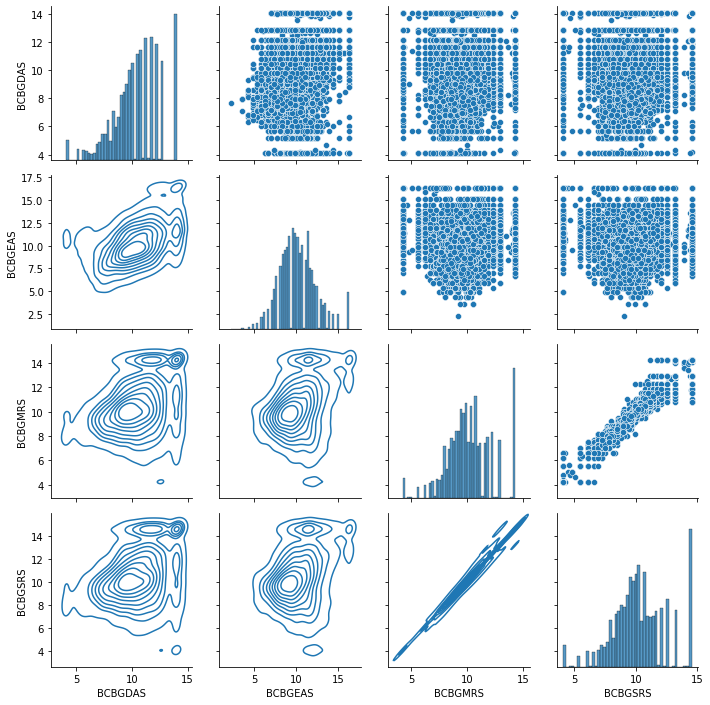

In [18]:
g = sns.PairGrid(school.loc[:,[col for col in school.columns if 'BCBG' in col]])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

**Initial Observations about `school` dataset:**
* School discipline problems and focus on academic success do not seem correlated with each other or resource shortages
* Math and science resource shortages are strongly correlated; schools seem to be investing or struggling in both math and science equally
* There are many schools with hardly any struggles with discipline or resources, while most other schools are spread equally across the spectrum

**`school` Data Preparation**
* drop unnecessary columns
* convert IDCNTRY, IDSCHOOL to integers
* Convert BCDGDAS, BCDGEAS, BCDGMRS, BCDGSRS, BCDGSBC to ordered categoricals
* rename all columns to be more descriptive
* merge with student performance by school

In [19]:
stud_ach.head()

,IDCNTRY,IDBOOK,IDSCHOOL,IDCLASS,IDSTUD,BNRGCAL1,BNRGCAL2,IDPOP,IDGRADER,IDGRADE,ITLANG_SA,LCID_SA,ITSEX,BSDAGE,ITADMINI,ILRELIAB,MP52024_val,MP52058_val,MP52125_val,MP52229_val,MP52063_val,MP52072_val,MP52146_val,MP52092_val,MP52046_val,MP52083_val,MP52082_val,MP52161_val,MP52418_val,MP72007_val,MP72025_val,MP72017_val,MP72190_val,MP72068_val,MP72076_val,MP72056_val,MP72098_val,MP72103_val,MP72121_val,MP72180_val,MP72198_val,MP72227_val,MP72170_val,MP72209_val,MP62005_val,MP62139_val,MP62164_val,MP62142_val,MP62084_val,MP62351_val,MP62223_val,MP62027_val,MP62174_val,MP62244_val,MP62261_val,MP62300_val,MP62254_val,MP62132_val,MP72178_val,MP72234_val,MP72020_val,MP72027_val,MP72052_val,MP72067_val,MP72083_val,MP72108_val,MP72181_val,MP72126_val,MP72164_val,MP72185_val,MP52413_val,MP52134_val,MP52078_val,MP52034_val,MP52174_val,MP52130_val,MP52073_val,MP52110_val,MP52105_val,MP52407_val,MP52036_val,MP52502_val,MP52117_val,MP52426_val,MP62150_val,MP62335_val,MP62219_val,MP62002_val,MP62149_val,MP62241_val,MP62342_val,MP62105_val,MP62040_val,MP62288_val,MP62173_val,MP62133_val,MP62123_val,MP52079_val,MP52204_val,MP52364_val,MP52215_val,MP52147_val,MP52067_val,MP52068_val,MP52087_val,MP52048_val,MP52039_val,MP52208_val,MP52419_val,MP52115_val,MP52421_val,MP72002_val,MP72188_val,MP72035_val,MP72055_val,MP72222_val,MP72090_val,MP72233_val,MP72106_val,MP72128_val,MP72119_val,MP72153_val,MP72172_val,MP62329_val,MP62151_val,MP62346_val,MP62212_val,MP62056_val,MP62317_val,MP62350_val,MP62078_val,MP62284_val,MP62245_val,MP62287_val,MP62345_val,MP62115_val,MP72187_val,MP72022_val,MP72038_val,MP72045_val,MP72049_val,MP72069_val,MP72074_val,MP72013_val,MP72095_val,MP72109_val,MP72125_val,MP72196_val,MP72237_val,MP72232_val,MP72206_val,MP62271_val,MP62152_val,MP62215_val,MP62143_val,MP62230_val,MP62095_val,MP62076_val,MP62030_val,MP62171_val,MP62301_val,MP62194_val,MP62344_val,MP62320_val,MP62296_val,MP72001_val,MP72019_val,MP72189_val,MP72024_val,MP72043_val,MP72221_val,MP72220_val,MP72225_val,MP72110_val,MP72150_val,MP72139_val,MP72229_val,MP72171_val,MP72211_val,MP62001_val,MP62214_val,MP62146_val,MP62154_val,MP62067_val,MP62341_val,MP62242_val,MP62250_val,MP62170_val,MP62192_val,MP62072_val,MP62048_val,MP62120_val,MP72005_val,MP72021_val,MP72026_val,MP72041_val,MP72223_val,MP72094_val,MP72059_val,MP72080_val,MP72081_val,MP72140_val,MP72120_val,MP72131_val,MP72147_val,MP72154_val,MP72192_val,MP72161_val,SP52006_val,SP52069_val,SP52012_val,SP52021_val,SP52095_val,SP52134_val,SP52054_val,SP52150_val,SP52243_val,SP52206_val,SP52112_val,SP52294_val,SP72072_val,SP72029_val,SP72902_val,SP72077_val,SP72900_val,SP72103_val,SP72110_val,SP72130_val,SP72148_val,SP72200_val,SP72232_val,SP72275_val,SP72244_val,SP72301_val,SP72721_val,SP72335_val,SP62055_val,SP62007_val,SP62275_val,SP62225_val,SP62111_val,SP62116_val,SP62262_val,SP62035_val,SP62144_val,SP62162_val,SP62233_val,SP62272_val,SP62171_val,SP72002_val,SP72403_val,SP72021_val,SP72082_val,SP72066_val,SP72063_val,SP72102_val,SP72141_val,SP72921_val,SP72234_val,SP72251_val,SP72284_val,SP72345_val,SP72349_val,SP72363_val,SP52076_val,SP52272_val,SP52085_val,SP52094_val,SP52248_val,SP52146_val,SP52282_val,SP52299_val,SP52144_val,SP52214_val,SP52221_val,SP52101_val,SP52113_val,SP52107_val,SP62090_val,SP62274_val,SP62284_val,SP62098_val,SP62032_val,SP62043_val,SP62158_val,SP62159_val,SP62005_val,SP62075_val,SP62004_val,SP62175_val,SP62173_val,SP52090_val,SP52262_val,SP52267_val,SP52273_val,SP52015_val,SP52051_val,SP52026_val,SP52130_val,SP52028_val,SP52189_val,SP52217_val,SP52038_val,SP52099_val,SP52118_val,SP72070_val,SP72400_val,SP72024_val,SP72462_val,SP72443_val,SP72903_val,SP72145_val,SP72100_val,SP72133_val,SP72137_val,SP72298_val,SP72215_val,SP72260_val,SP72265_val,SP72347_val,SP72351_val,SP72367_val,SP62099_val,SP62095_val,SP62106_val,SP62064_val,SP62132_val,SP62163_val,SP62153_val,SP62018_val,SP62143_val,SP62276_val,SP62050_val,SP62205_val,SP62190_val,SP62024_val,SP72033_val,SP72440_val,SP7203

In [20]:
stud_ach_drop_new = list(stud_ach.columns[stud_ach.isna().all()])+list(stud_ach.columns[stud_ach.nunique()==1])

In [21]:
stud_ach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295453 entries, 0 to 295452
Columns: 445 entries, IDCNTRY to srea_sd
dtypes: float64(434), object(11)
memory usage: 1003.1+ MB


In [22]:
stud_ach.describe()

,IDCNTRY,IDSCHOOL,IDCLASS,IDSTUD,BSDAGE,MP52024_val,MP52058_val,MP52125_val,MP52229_val,MP52063_val,MP52072_val,MP52146_val,MP52092_val,MP52046_val,MP52083_val,MP52082_val,MP52161_val,MP52418_val,MP72007_val,MP72025_val,MP72017_val,MP72190_val,MP72068_val,MP72076_val,MP72056_val,MP72098_val,MP72103_val,MP72121_val,MP72180_val,MP72198_val,MP72227_val,MP72170_val,MP72209_val,MP62005_val,MP62139_val,MP62164_val,MP62142_val,MP62084_val,MP62351_val,MP62223_val,MP62027_val,MP62174_val,MP62244_val,MP62261_val,MP62300_val,MP62254_val,MP62132_val,MP72178_val,MP72234_val,MP72020_val,MP72027_val,MP72052_val,MP72067_val,MP72083_val,MP72108_val,MP72181_val,MP72126_val,MP72164_val,MP72185_val,MP52413_val,MP52134_val,MP52078_val,MP52034_val,MP52174_val,MP52130_val,MP52073_val,MP52110_val,MP52105_val,MP52407_val,MP52036_val,MP52502_val,MP52117_val,MP52426_val,MP62150_val,MP62335_val,MP62219_val,MP62002_val,MP62149_val,MP62241_val,MP62342_val,MP62105_val,MP62040_val,MP62288_val,MP62173_val,MP62133_val,MP62123_val,MP52079_val,MP52204_val,MP52364_val,MP52215_val,MP52147_val,MP52067_val,MP52068_val,MP52087_val,MP52048_val,MP52039_val,MP52208_val,MP52419_val,MP52115_val,MP52421_val,MP72002_val,MP72188_val,MP72035_val,MP72055_val,MP72222_val,MP72090_val,MP72233_val,MP72106_val,MP72128_val,MP72119_val,MP72153_val,MP72172_val,MP62329_val,MP62151_val,MP62346_val,MP62212_val,MP62056_val,MP62317_val,MP62350_val,MP62078_val,MP62284_val,MP62245_val,MP62287_val,MP62345_val,MP62115_val,MP72187_val,MP72022_val,MP72038_val,MP72045_val,MP72049_val,MP72069_val,MP72074_val,MP72013_val,MP72095_val,MP72109_val,MP72125_val,MP72196_val,MP72237_val,MP72232_val,MP72206_val,MP62271_val,MP62152_val,MP62215_val,MP62143_val,MP62230_val,MP62095_val,MP62076_val,MP62030_val,MP62171_val,MP62301_val,MP62194_val,MP62344_val,MP62320_val,MP62296_val,MP72001_val,MP72019_val,MP72189_val,MP72024_val,MP72043_val,MP72221_val,MP72220_val,MP72225_val,MP72110_val,MP72150_val,MP72139_val,MP72229_val,MP72171_val,MP72211_val,MP62001_val,MP62214_val,MP62146_val,MP62154_val,MP62067_val,MP62341_val,MP62242_val,MP62250_val,MP62170_val,MP62192_val,MP62072_val,MP62048_val,MP62120_val,MP72005_val,MP72021_val,MP72026_val,MP72041_val,MP72223_val,MP72094_val,MP72059_val,MP72080_val,MP72081_val,MP72140_val,MP72120_val,MP72131_val,MP72147_val,MP72154_val,MP72192_val,MP72161_val,SP52006_val,SP52069_val,SP52012_val,SP52021_val,SP52095_val,SP52134_val,SP52054_val,SP52150_val,SP52243_val,SP52206_val,SP52112_val,SP52294_val,SP72072_val,SP72029_val,SP72902_val,SP72077_val,SP72900_val,SP72103_val,SP72110_val,SP72130_val,SP72148_val,SP72200_val,SP72232_val,SP72275_val,SP72244_val,SP72301_val,SP72721_val,SP72335_val,SP62055_val,SP62007_val,SP62275_val,SP62225_val,SP62111_val,SP62116_val,SP62262_val,SP62035_val,SP62144_val,SP62162_val,SP62233_val,SP62272_val,SP62171_val,SP72002_val,SP72403_val,SP72021_val,SP72082_val,SP72066_val,SP72063_val,SP72102_val,SP72141_val,SP72921_val,SP72234_val,SP72251_val,SP72284_val,SP72345_val,SP72349_val,SP72363_val,SP52076_val,SP52272_val,SP52085_val,SP52094_val,SP52248_val,SP52146_val,SP52282_val,SP52299_val,SP52144_val,SP52214_val,SP52221_val,SP52101_val,SP52113_val,SP52107_val,SP62090_val,SP62274_val,SP62284_val,SP62098_val,SP62032_val,SP62043_val,SP62158_val,SP62159_val,SP62005_val,SP62075_val,SP62004_val,SP62175_val,SP62173_val,SP52090_val,SP52262_val,SP52267_val,SP52273_val,SP52015_val,SP52051_val,SP52026_val,SP52130_val,SP52028_val,SP52189_val,SP52217_val,SP52038_val,SP52099_val,SP52118_val,SP72070_val,SP72400_val,SP72024_val,SP72462_val,SP72443_val,SP72903_val,SP72145_val,SP72100_val,SP72133_val,SP72137_val,SP72298_val,SP72215_val,SP72260_val,SP72265_val,SP72347_val,SP72351_val,SP72367_val,SP62099_val,SP62095_val,SP62106_val,SP62064_val,SP62132_val,SP62163_val,SP62153_val,SP62018_val,SP62143_val,SP62276_val,SP62050_val,SP62205_val,SP62190_val,SP62024_val,SP72033_val,SP72440_val,SP72032_val,SP72031_val,SP72086_val,SP72005_val,SP72048_val,SP72123_val,SP72116_val,SP72920_val,

In [23]:
stud_ach.loc[:,[col for col in stud_ach.columns if '_val' not in col and '_avg' not in col and '_sd' not in col]].dtypes

IDCNTRY      float64
IDBOOK        object
IDSCHOOL     float64
IDCLASS      float64
IDSTUD       float64
BNRGCAL1      object
BNRGCAL2      object
IDPOP         object
IDGRADER      object
IDGRADE       object
ITLANG_SA     object
LCID_SA       object
ITSEX         object
BSDAGE       float64
ITADMINI      object
ILRELIAB      object
dtype: object

In [24]:
stud_ach_codes.loc[[col for col in stud_ach.columns if '_val' not in col and '_avg' not in col and '_sd' not in col],:]

,Label
Variable,
IDCNTRY,Country ID - Numeric ISO Code
IDBOOK,Student Test Booklet
IDSCHOOL,School ID
IDCLASS,Class ID
IDSTUD,Student ID
BNRGCAL1,CALCULATOR SURVEY\USE OF CALCULATOR
BNRGCAL2,CALCULATOR SURVEY\FREQUENCY OF USING CALCULATOR
IDPOP,Population ID
IDGRADER,Standardized Grade ID


In [25]:
stud_ach_drop_new = stud_ach_drop_new+['BNRGCAL1','BNRGCAL2','ITADMINI','ILRELIAB']
stud_ach_drop_new

['MP62342_val',
 'MP72038_val',
 'MP62048_val',
 'SP62272_val',
 'SP52221_val',
 'SP72133_val',
 'SP72048_val',
 'SP62036_val',
 'SP72906_val',
 'SP72329_val',
 'SP62266_val',
 'IDPOP',
 'IDGRADER',
 'BNRGCAL1',
 'BNRGCAL2',
 'ITADMINI',
 'ILRELIAB']

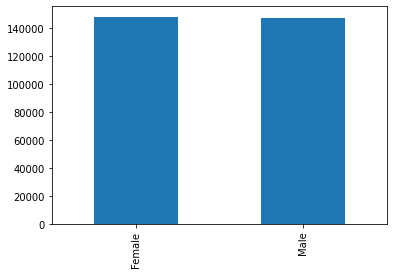

In [26]:
stud_ach['ITSEX'].value_counts().plot(kind='bar');

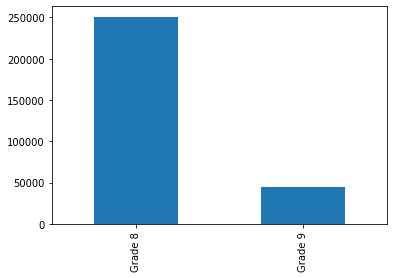

In [27]:
stud_ach['IDGRADE'].value_counts().plot(kind='bar');

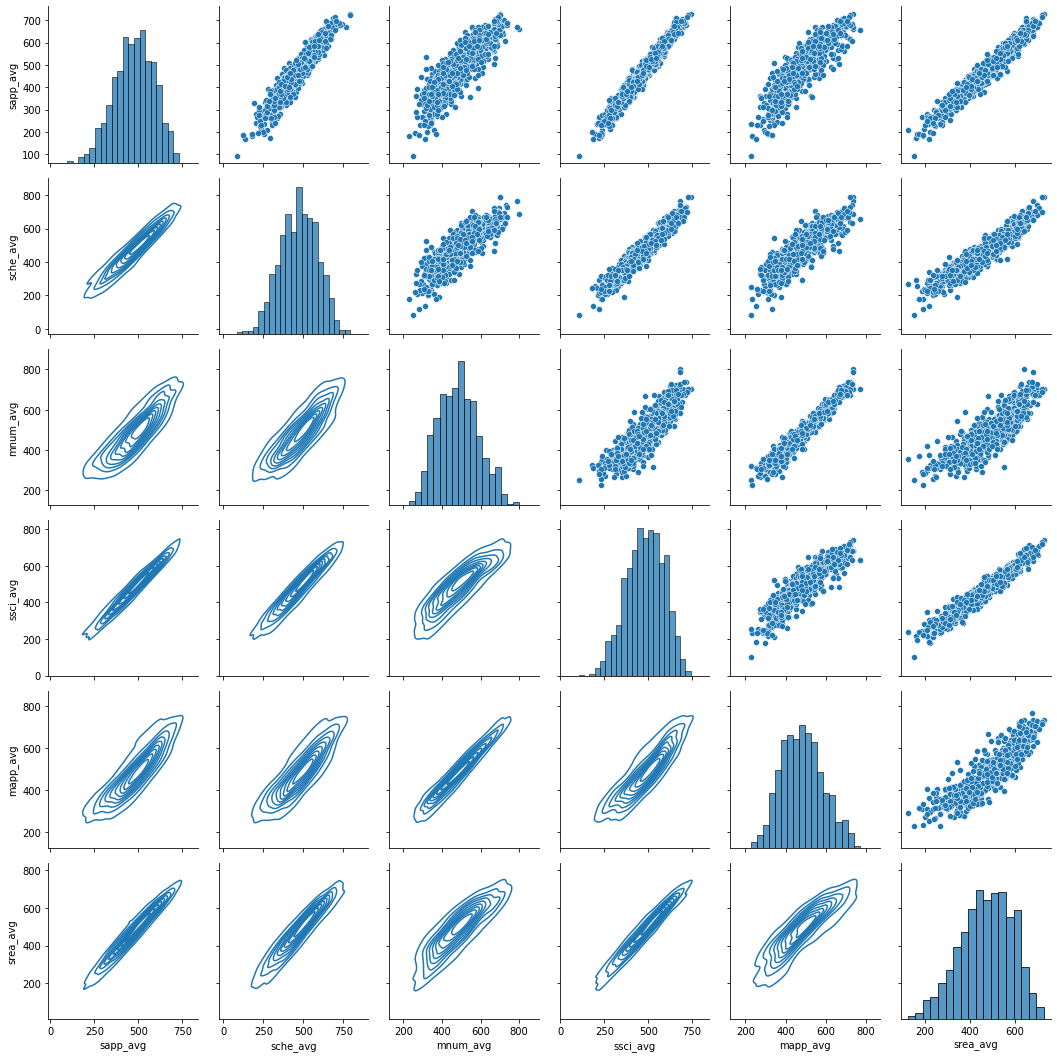

In [28]:
g = sns.PairGrid(stud_ach.sample(1000).loc[:,random.sample([col for col in stud_ach.columns if '_avg' in col],6)])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

**Initial Observations about `stud_ach` dataset:**
* All mathematical understanding is closely related (strong correlation)
* All science understanding is closely related (strong correlation)
* The relationship between science and math has more variance - is this due to subject differences or the difference in teaching?

**`stud_ach` Data Preparation**
* drop unnecessary (or null) columns
* convert IDCNTRY, IDSCHOOL, IDCLASS, IDSTUD to integers
* trim and convert IDBOOK, IDGRADE to integer
* rename all columns to be more descriptive

In [29]:
student.head()

,IDCNTRY,IDBOOK,IDSCHOOL,IDCLASS,IDSTUD,BSBG01,BSBG03,BSBG04,BSBG05A,BSBG05B,BSBG05C,BSBG05D,BSBG05E,BSBG05F,BSBG05G,BSBG05H,BSBG05I,BSBG06A,BSBG06B,BSBG07,BSBG08A,BSBG08B,BSBG09A,BSBG09B,BSBG10,BSBG11A,BSBG11B,BSBG12A,BSBG12B,BSBG12C,BSBG12D,BSBG12E,BSBG12F,IDPOP,IDGRADE,ITLANG_SQ,LCID_SQ,ITLANG_SA,LCID_SA,ITSEX,BSDAGE,BSBGHER,BSDGHER,BSBGSSB,BSDGSSB,BSBGSB,BSDGSB,BSBGSLM,BSDGSLM,BSBGICM,BSDGICM,BSBGDML,BSDGDML,BSBGSCM,BSDGSCM,BSBGSVM,BSDGSVM,BSBGSLS,BSDGSLS,BSBGICS,BSDGICS,BSBGSCS,BSDGSCS,BSBGSVS,BSDGSVS,BSBGSLB,BSDGSLB,BSBGICB,BSDGICB,BSBGSCB,BSDGSCB,BSBGSLE,BSDGSLE,BSBGICE,BSDGICE,BSBGSCE,BSDGSCE,BSBGSLC,BSDGSLC,BSBGICC,BSDGICC,BSBGSCC,BSDGSCC,BSBGSLP,BSDGSLP,BSBGICP,BSDGICP,BSBGSCP,BSDGSCP,BSBGSEC,BSDGSEC,BSDG05S,BSDGEDUP
0,7842.0,Booklet 11,5001.0,500102.0,50010201.0,Boy,Almost always,Enough to fill one shelf (11–25 books),Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,"<Post-secondary, non-tertiary education—ISCED ...",<Bachelor’s or equivalent level—ISCED Level 6>,Finish <Bachelor’s or equivalent level—ISCED L...,Yes,Yes,Yes,NaN,Never or almost never,Sometimes,Sometimes,Yes,Yes,Yes,Yes,Yes,Yes,Pop 2,Grade 8,English,English (U.A.E. Abu Dhabi),English,English (U.A.E. Abu Dhabi),Male,13.58,10.84499,Some Resources,12.80573,High Sense of School Belonging,12.93734,Never or Almost Never,11.75478,Very Much Like Learning Mathematics,10.38389,High Clarity of Instruction,11.40970,Some Lessons,10.35323,Somewhat Confident in Mathematics,10.34734,Strongly Value Mathematics,10.10421,Somewhat Like Learning Science,10.78969,High Clarity of Instruction,11.39185,Very Confident in Science,12.9367,Strongly Value Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.68313,Medium Self-Efficacy,Both Own Room and Internet Connection,University or Higher
1,7842.0,Booklet 12,5001.0,500102.0,50010202.0,Boy,Almost always,Enough to fill one shelf (11–25 books),Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,<Short-cycle tertiary education—ISCED Level 5>,<Short-cycle tertiary education—ISCED Level 5>,Finish <Bachelor’s or equivalent level—ISCED L...,Yes,Yes,Yes,NaN,Never or almost never,Sometimes,Sometimes,Yes,Yes,Yes,Yes,Yes,Yes,Pop 2,Grade 8,English,English (U.A.E. Abu Dhabi),English,English (U.A.E. Abu Dhabi),Male,13.75,10.23835,Some Resources,13.27199,High Sense of School Belonging,12.93734,Never or Almost Never,11.42832,Very Much Like Learning Mathematics,10.38389,High Clarity of Instruction,11.10343,Some Lessons,10.35323,Somewhat Confident in Mathematics,10.34734,Strongly Value Mathematics,10.68878,Very Much Like Learning Science,10.78969,High Clarity of Instruction,10.70197,Somewhat Confident in Science,12.9367,Strongly Value Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.52147,Medium Self-Efficacy,Both Own Room and Internet Connection,Post-secondary but not University
2,7842.0,Booklet 13,5001.0,500102.0,50010203.0,Boy,Always,None or very few (0–10 books),Yes,No,Yes,No,Yes,No,Yes,No,Yes,NaN,<Short-cycle tertiary education—ISCED Level 5>,Finish <Lower secondary education—ISCED Level 2>,Yes,No,Yes,NaN,Never or almost never,Sometimes,Sometimes,Yes,Yes,Yes,Yes,Yes,Yes,Pop 2,Grade 8,English,English (U.A.E. Abu Dhabi),English,English (U.A.E. Abu Dhabi),Male,13.50,9.03613,Some Resources,13.27199,High Sense of School Belonging,12.93734,Never or Almost Never,11.75478,Very Much Like Learning Mathematics,10.38389,High Clarity of Instruction,11.40970,Some Lessons,8.51433,Not Confident in Mathematics,6.48714,Do Not Value Mathematics,10.36663,Somewhat Like Learning Science,10.78969,High Clarity of Instruction,11.39185,Very Confident in Science,12.9367,Strongly Value Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.52551,High Self-Efficacy,Either Own Room or Internet Connection,Post-secondary but not University
3,7842.0,Booklet 14,5001.0,500102.0,50010204.0,Boy,Almost always,Enough to fill one shelf (11–25 books),Y

In [30]:
student_drop_new = list(student.columns[student.isna().all()])+list(student.columns[student.nunique()==1])

In [31]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295453 entries, 0 to 295452
Data columns (total 93 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   IDCNTRY    295453 non-null  float64
 1   IDBOOK     295453 non-null  object 
 2   IDSCHOOL   295453 non-null  float64
 3   IDCLASS    295453 non-null  float64
 4   IDSTUD     295453 non-null  float64
 5   BSBG01     292598 non-null  object 
 6   BSBG03     290052 non-null  object 
 7   BSBG04     290351 non-null  object 
 8   BSBG05A    290843 non-null  object 
 9   BSBG05B    290610 non-null  object 
 10  BSBG05C    285147 non-null  object 
 11  BSBG05D    289807 non-null  object 
 12  BSBG05E    290379 non-null  object 
 13  BSBG05F    266242 non-null  object 
 14  BSBG05G    237077 non-null  object 
 15  BSBG05H    223433 non-null  object 
 16  BSBG05I    203576 non-null  object 
 17  BSBG06A    283039 non-null  object 
 18  BSBG06B    282538 non-null  object 
 19  BSBG07     284088 non-n

In [32]:
student.describe()

,IDCNTRY,IDSCHOOL,IDCLASS,IDSTUD,BSDAGE,BSBGHER,BSBGSSB,BSBGSB,BSBGSLM,BSBGICM,BSBGDML,BSBGSCM,BSBGSVM,BSBGSLS,BSBGICS,BSBGSCS,BSBGSVS,BSBGSLB,BSBGICB,BSBGSCB,BSBGSLE,BSBGICE,BSBGSCE,BSBGSLC,BSBGICC,BSBGSCC,BSBGSLP,BSBGICP,BSBGSCP,BSBGSEC
count,295453.000000,295453.000000,295453.000000,2.954530e+05,295007.000000,289242.000000,290131.00000,284744.000000,290408.000000,289976.000000,282896.000000,289359.000000,288760.000000,220370.000000,219680.000000,219342.000000,285862.000000,66641.000000,66479.000000,66416.000000,54472.000000,54320.000000,54252.000000,65734.000000,65556.000000,65417.000000,65719.000000,65491.000000,65368.000000,136629.000000
mean,35669.770887,5147.488924,514752.442145,5.147526e+07,14.293059,10.251069,9.86241,9.776433,9.961073,10.072908,9.916083,10.019942,9.840356,10.117461,10.072631,10.079303,10.086556,9.969839,9.932821,9.982285,9.961898,9.964434,9.998950,9.970825,9.948196,9.937674,10.011737,9.969336,10.010515,10.072507
std,150889.861246,129.955610,12995.298104,1.299530e+06,0.816446,1.684202,1.95809,2.017834,1.903557,1.997334,1.992961,2.089437,2.054977,2.027841,1.979049,2.007870,1.910471,2.006163,2.003414,1.984479,2.005631,1.998236,1.993684,2.017648,2.002994,1.990926,2.017097,2.000978,1.988876,1.974740
min,36.000000,5001.000000,500101.000000,5.001010e+07,9.080000,4.552080,3.92440,1.953440,5.094840,3.695680,5.566330,3.277930,3.036820,3.846500,4.022730,3.249920,4.283400,3.770330,3.805730,3.049750,4.020150,4.198000,3.210940,4.381810,4.449820,3.896350,4.500520,4.575930,3.904790,3.210100
25%,380.000000,5057.000000,505701.000000,5.057011e+07,13.750000,9.036130,8.46096,8.357840,8.761390,8.518960,8.705590,8.997360,8.346150,8.696610,8.528200,8.873810,8.817250,8.646750,8.476250,8.768360,8.720260,8.604940,8.807510,8.772590,8.694020,8.784090,8.744740,8.458410,8.918210,8.521470
50%,578.000000,5114.000000,511402.000000,5.114023e+07,14.170000,10.238350,9.40801,9.569750,9.866380,9.926750,9.941130,9.804960,9.654380,9.817230,10.306400,9.615810,9.895320,9.576050,9.939960,9.628410,9.614740,10.090050,9.665740,9.709260,9.753180,9.732660,9.773820,9.829670,9.661350,10.168600
75%,784.000000,5189.000000,518902.000000,5.189020e+07,14.670000,11.487120,11.62252,11.187840,11.148590,11.651150,11.103430,11.104060,11.301900,11.533000,11.431060,11.024140,11.354160,11.404230,11.547870,10.979050,11.265810,11.608490,11.013050,11.138650,11.561420,10.855390,10.993720,11.597720,10.747560,12.565180
max,710004.000000,5631.000000,563102.000000,5.631021e+07,19.000000,13.515430,13.27199,12.937340,13.848490,13.018850,14.673710,15.851880,13.482930,13.517780,12.633860,14.841820,12.936700,13.864760,12.776070,14.925630,14.057380,12.753610,14.910220,13.776840,12.636810,14.721900,13.952830,12.640740,15.003590,12.565180


In [33]:
student.dtypes

IDCNTRY      float64
IDBOOK        object
IDSCHOOL     float64
IDCLASS      float64
IDSTUD       float64
BSBG01        object
BSBG03        object
BSBG04        object
BSBG05A       object
BSBG05B       object
BSBG05C       object
BSBG05D       object
BSBG05E       object
BSBG05F       object
BSBG05G       object
BSBG05H       object
BSBG05I       object
BSBG06A       object
BSBG06B       object
BSBG07        object
BSBG08A       object
BSBG08B       object
BSBG09A       object
BSBG09B       object
BSBG10        object
BSBG11A       object
BSBG11B       object
BSBG12A       object
BSBG12B       object
BSBG12C       object
BSBG12D       object
BSBG12E       object
BSBG12F       object
IDPOP         object
IDGRADE       object
ITLANG_SQ     object
LCID_SQ       object
ITLANG_SA     object
LCID_SA       object
ITSEX         object
BSDAGE       float64
BSBGHER      float64
BSDGHER       object
BSBGSSB      float64
BSDGSSB       object
BSBGSB       float64
BSDGSB        object
BSBGSLM      

In [34]:
student_codes.loc[student.columns,:]

,Label
IDCNTRY,Country ID - Numeric ISO Code
IDBOOK,Student Test Booklet
IDSCHOOL,School ID
IDCLASS,Class ID
IDSTUD,Student ID
BSBG01,GEN\SEX OF STUDENT
BSBG03,GEN\OFTEN SPEAK <LANG OF TEST> AT HOME
BSBG04,GEN\AMOUNT OF BOOKS IN YOUR HOME
BSBG05A,GEN\HOME POSSESS\COMPUTER TABLET
BSBG05B,GEN\HOME POSSESS\STUDY DESK


In [35]:
student['BSDGSB'].unique()

array(['Never or Almost Never', 'About Monthly', 'About Weekly', nan],
      dtype=object)

In [36]:
student.query('ITLANG_SQ != ITLANG_SA and ITLANG_SQ == ITLANG_SQ')

,IDCNTRY,IDBOOK,IDSCHOOL,IDCLASS,IDSTUD,BSBG01,BSBG03,BSBG04,BSBG05A,BSBG05B,BSBG05C,BSBG05D,BSBG05E,BSBG05F,BSBG05G,BSBG05H,BSBG05I,BSBG06A,BSBG06B,BSBG07,BSBG08A,BSBG08B,BSBG09A,BSBG09B,BSBG10,BSBG11A,BSBG11B,BSBG12A,BSBG12B,BSBG12C,BSBG12D,BSBG12E,BSBG12F,IDPOP,IDGRADE,ITLANG_SQ,LCID_SQ,ITLANG_SA,LCID_SA,ITSEX,BSDAGE,BSBGHER,BSDGHER,BSBGSSB,BSDGSSB,BSBGSB,BSDGSB,BSBGSLM,BSDGSLM,BSBGICM,BSDGICM,BSBGDML,BSDGDML,BSBGSCM,BSDGSCM,BSBGSVM,BSDGSVM,BSBGSLS,BSDGSLS,BSBGICS,BSDGICS,BSBGSCS,BSDGSCS,BSBGSVS,BSDGSVS,BSBGSLB,BSDGSLB,BSBGICB,BSDGICB,BSBGSCB,BSDGSCB,BSBGSLE,BSDGSLE,BSBGICE,BSDGICE,BSBGSCE,BSDGSCE,BSBGSLC,BSDGSLC,BSBGICC,BSDGICC,BSBGSCC,BSDGSCC,BSBGSLP,BSDGSLP,BSBGICP,BSDGICP,BSBGSCP,BSDGSCP,BSBGSEC,BSDGSEC,BSDG05S,BSDGEDUP
8393,7841.0,Booklet 10,5035.0,503502.0,50350201.0,Girl,Always,Enough to fill one bookcase (26–100 books),Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,<Upper secondary education—ISCED Level 3>,Some <Primary education—ISCED Level 1 or Lower...,Finish <Upper secondary education—ISCED Level 3>,Yes,Yes,Yes,NaN,Once a week,Every day,Sometimes,Yes,No,Yes,Yes,Yes,Yes,Pop 2,Grade 8,English,English (U.A.E. Dubai),Arabic,Arabic (U.A.E. Dubai),Female,13.75,10.23835,Some Resources,5.90263,Little Sense of School Belonging,9.05015,Never or Almost Never,8.94763,Do Not Like Learning Mathematics,10.38389,High Clarity of Instruction,9.71101,Some Lessons,9.45004,Not Confident in Mathematics,7.50425,Do Not Value Mathematics,8.29500,Do Not Like Learning Science,7.75780,Low Clarity of Instruction,9.12286,Not Confident in Science,7.41821,Do Not Value Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.87554,Medium Self-Efficacy,Both Own Room and Internet Connection,Upper Secondary
8394,7841.0,Booklet 11,5035.0,503502.0,50350202.0,Girl,Always,Enough to fill one bookcase (26–100 books),Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,<Lower secondary education—ISCED Level 2>,Some <Primary education—ISCED Level 1 or Lower...,Finish <Bachelor’s or equivalent level—ISCED L...,Yes,Yes,Yes,NaN,Once every two weeks,Every day,Every day,No,Yes,Yes,No,Yes,No,Pop 2,Grade 8,English,English (U.A.E. Dubai),Arabic,Arabic (U.A.E. Dubai),Female,13.83,9.64761,Some Resources,8.08091,Some Sense of School Belonging,7.74978,About Monthly,7.71308,Do Not Like Learning Mathematics,10.38389,High Clarity of Instruction,10.67499,Some Lessons,9.45004,Not Confident in Mathematics,8.82228,Somewhat Value Mathematics,9.11856,Somewhat Like Learning Science,12.63386,High Clarity of Instruction,9.36803,Somewhat Confident in Science,10.13091,Somewhat Value Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.16860,High Self-Efficacy,Both Own Room and Internet Connection,Lower Secondary
8395,7841.0,Booklet 12,5035.0,503502.0,50350203.0,Girl,Always,Enough to fill one bookcase (26–100 books),Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,I don’t know,<Upper secondary education—ISCED Level 3>,Finish <Upper secondary education—ISCED Level 3>,Yes,Yes,No,5 to 10 years old,Never or almost never,Almost every day,Sometimes,No,Yes,Yes,No,No,No,Pop 2,Grade 8,English,English (U.A.E. Dubai),Arabic,Arabic (U.A.E. Dubai),Female,13.33,9.64761,Some Resources,10.00496,Some Sense of School Belonging,8.66719,About Monthly,10.25252,Somewhat Like Learning Mathematics,13.01885,High Clarity of Instruction,12.25252,Few or No Lessons,9.89515,Somewhat Confident in Mathematics,9.98068,Somewhat Value Mathematics,10.36663,Somewhat Like Learning Science,10.30640,High Clarity of Instruction,9.36803,Somewhat Confident in Science,10.65629,Strongly Value Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.02143,High Self-Efficacy,Either Own Room or Internet Connection,Upper Secondary
8396,7841.0,Booklet 13,5035.0,503502.0,50350204.0,Girl,Always,Enough to fill one shelf (11–25 books),Yes,No,No,Yes,Yes,Yes,Yes,No,No,<Postgraduate degree: Master’s—ISCED Level 7 o...,<Postgraduate degr

In [37]:
student_drop_new = student_drop_new + ['BSBG01','LCID_SQ','LCID_SA']

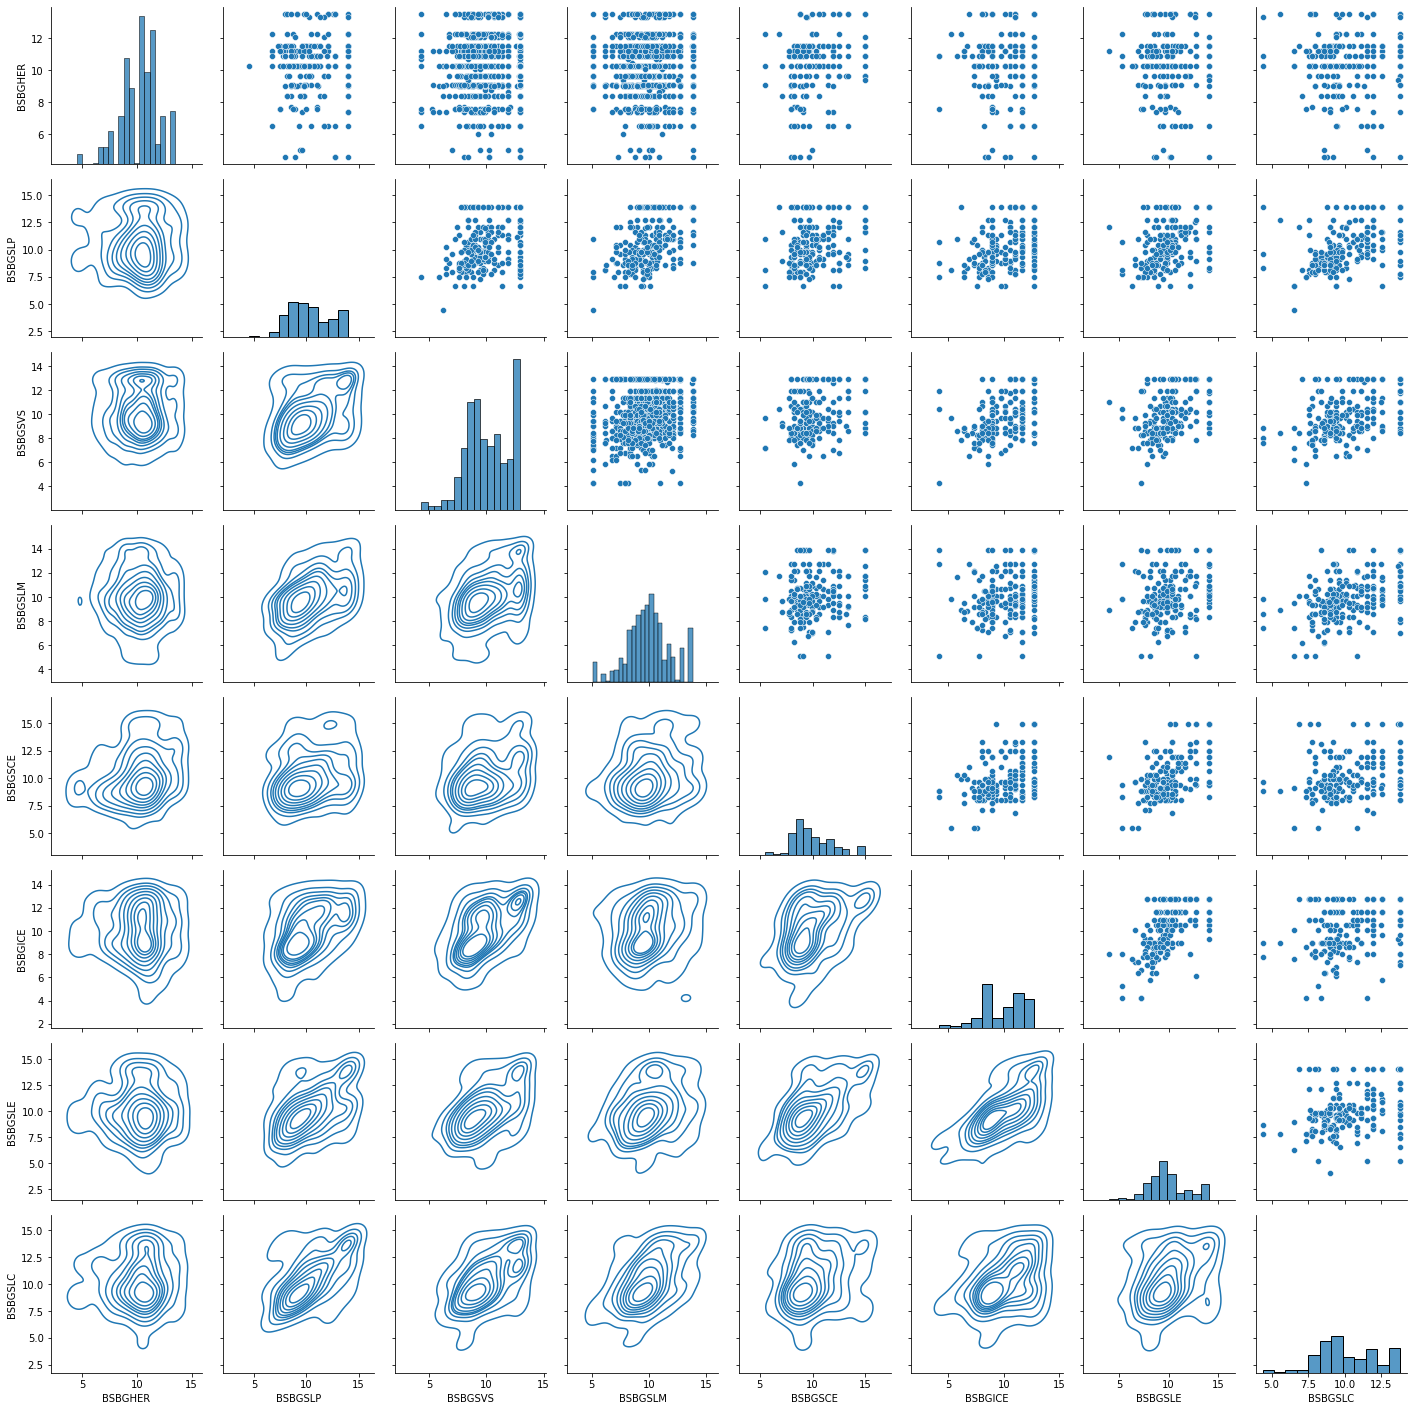

In [38]:
g = sns.PairGrid(student.sample(1000).loc[:,random.sample([col for col in student.columns if 'BSBG' in col and student[col].dtype == 'float64'],8)])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

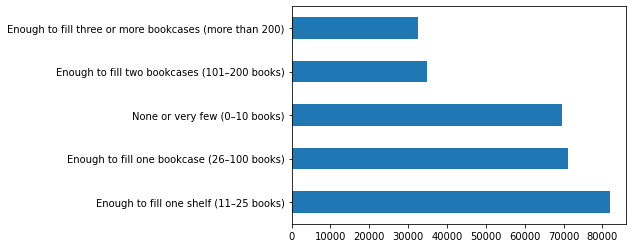

In [39]:
student['BSBG04'].value_counts().plot(kind='barh');

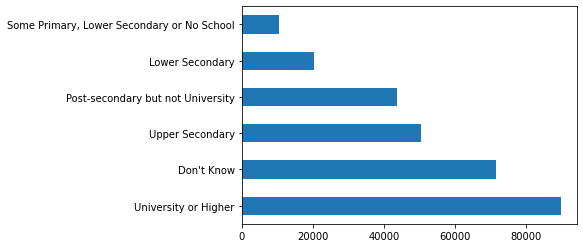

In [40]:
student['BSDGEDUP'].value_counts().plot(kind='barh');

**Initial Observations about `student` dataset:**
* Apparent correlation between instructional clarity across all science classes (possible link to instructional quality at the school level)
* Wide variance in the number of books in the home
* Wide variance in highest parental education, but university is most common

**`student` Data Preparation**
* drop unnecessary columns
* convert IDCNTRY, IDSCHOOL, IDCLASS, IDSTUD to integers
* trim and convert IDBOOK, IDGRADE to integers
* convert to integer and combine BSBG05* columns to home_possession column
* convert to integer and combine BSBG09* columns to age_immigration column
* convert to integer and combine BSBG12* columns to internet_access column
* convert BSBG03, BSBG04, BSBG10, BSBG11*, BSDG* columns to ordered categoricals
* trim and convert BSBG06A, BSBG06B, BSBG07 to ordered categoricals (ISCED level)
* convert BSBG08* to boolean
* rename all columns to be more descriptive
* merge with student performance

In [41]:
stud_teach.head()

,IDCNTRY,IDBOOK,IDSCHOOL,IDCLASS,IDSTUD,IDTEALIN,IDTEACH,IDLINK,IDPOP,IDGRADE,IDSUBJ,ITCOURSE,NMTEACH,NSTEACH,mmat_avg,ssci_avg,malg_avg,mapp_avg,mdat_avg,mgeo_avg,mkno_avg,mnum_avg,mrea_avg,sapp_avg,sbio_avg,sche_avg,sear_avg,skno_avg,sphy_avg,srea_avg
0,7842.0,Booklet 11,5001.0,500102.0,50010201.0,50010101.0,500101.0,1.0,Pop 2,Grade 8,Mathematics,Mathematics,1.0,1.0,550.550842,480.099946,517.042408,502.836180,485.677994,508.168950,527.618686,535.162198,517.203196,459.227332,404.517518,443.350576,412.148076,471.580088,450.679538,464.316504
1,7842.0,Booklet 11,5001.0,500102.0,50010201.0,50010203.0,500102.0,3.0,Pop 2,Grade 8,Science,Integrated science,1.0,1.0,550.550842,480.099946,517.042408,502.836180,485.677994,508.168950,527.618686,535.162198,517.203196,459.227332,404.517518,443.350576,412.148076,471.580088,450.679538,464.316504
2,7842.0,Booklet 12,5001.0,500102.0,50010202.0,50010203.0,500102.0,3.0,Pop 2,Grade 8,Science,Integrated science,1.0,1.0,326.129702,318.662552,323.233832,356.545632,302.030198,328.756934,352.864178,355.017696,385.102162,315.159308,295.509340,324.683132,343.312374,323.550294,343.942730,315.274280
3,7842.0,Booklet 12,5001.0,500102.0,50010202.0,50010101.0,500101.0,1.0,Pop 2,Grade 8,Mathematics,Mathematics,1.0,1.0,326.129702,318.662552,323.233832,356.545632,302.030198,328.756934,352.864178,355.017696,385.102162,315.159308,295.509340,324.683132,343.312374,323.550294,343.942730,315.274280
4,7842.0,Booklet 13,5001.0,500102.0,50010203.0,50010101.0,500101.0,1.0,Pop 2,Grade 8,Mathematics,Mathematics,1.0,1.0,393.169444,328.771868,420.589982,389.112222,371.349082,391.344424,417.370708,386.164962,407.777500,310.335522,279.297756,321.583934,291.039122,313.976578,350.246454,315.896516


In [42]:
stud_teach_drop_new = list(stud_teach.columns[stud_teach.isna().all()])+list(stud_teach.columns[stud_teach.nunique()==1])

In [43]:
stud_teach_drop_new = stud_teach_drop_new + ['IDBOOK']

In [44]:
stud_teach.nunique()

IDCNTRY         46
IDBOOK          22
IDSCHOOL       631
IDCLASS       3311
IDSTUD       96976
IDTEALIN      8674
IDTEACH       3995
IDLINK          34
IDPOP            1
IDGRADE          2
IDSUBJ           2
ITCOURSE         9
NMTEACH          7
NSTEACH          9
mmat_avg    270402
ssci_avg    270380
malg_avg    217888
mapp_avg    214582
mdat_avg    217903
mgeo_avg    217868
mkno_avg    214587
mnum_avg    217887
mrea_avg    214563
sapp_avg    227727
sbio_avg    227746
sche_avg    227735
sear_avg    227724
skno_avg    227725
sphy_avg    227734
srea_avg    227723
dtype: int64

In [45]:
stud_teach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775679 entries, 0 to 775678
Data columns (total 30 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   IDCNTRY   775679 non-null  float64
 1   IDBOOK    775679 non-null  object 
 2   IDSCHOOL  775679 non-null  float64
 3   IDCLASS   775679 non-null  float64
 4   IDSTUD    775679 non-null  float64
 5   IDTEALIN  775679 non-null  float64
 6   IDTEACH   775679 non-null  float64
 7   IDLINK    775679 non-null  float64
 8   IDPOP     775679 non-null  object 
 9   IDGRADE   775679 non-null  object 
 10  IDSUBJ    775679 non-null  object 
 11  ITCOURSE  775679 non-null  object 
 12  NMTEACH   775679 non-null  float64
 13  NSTEACH   774759 non-null  float64
 14  mmat_avg  775679 non-null  float64
 15  ssci_avg  775679 non-null  float64
 16  malg_avg  620626 non-null  float64
 17  mapp_avg  603971 non-null  float64
 18  mdat_avg  620626 non-null  float64
 19  mgeo_avg  620626 non-null  float64
 20  mkno

In [46]:
stud_teach.describe()

,IDCNTRY,IDSCHOOL,IDCLASS,IDSTUD,IDTEALIN,IDTEACH,IDLINK,NMTEACH,NSTEACH,mmat_avg,ssci_avg,malg_avg,mapp_avg,mdat_avg,mgeo_avg,mkno_avg,mnum_avg,mrea_avg,sapp_avg,sbio_avg,sche_avg,sear_avg,skno_avg,sphy_avg,srea_avg
count,775679.000000,775679.000000,775679.000000,7.756790e+05,7.756790e+05,775679.000000,775679.000000,775679.000000,774759.000000,775679.000000,775679.000000,620626.000000,603971.000000,620626.000000,620626.000000,603971.000000,620626.000000,603971.000000,662865.000000,662865.000000,662865.000000,662865.000000,662865.000000,662865.000000,662865.000000
mean,37465.527130,5140.928510,514096.189617,5.140963e+07,5.140959e+07,514095.866035,3.895333,1.053588,2.028420,489.088003,488.528813,495.967189,491.867137,483.006341,491.025065,494.050350,491.570938,494.484773,485.310309,485.113651,484.675805,479.326665,484.771978,484.623848,482.984125
std,153150.434185,123.909897,12390.828566,1.239084e+06,1.239079e+06,12390.789203,7.323645,0.345699,1.280168,101.753267,105.866719,104.567953,101.875097,109.829002,104.770478,105.595112,102.670330,101.734562,108.677419,112.423132,111.495880,117.027184,111.524588,108.344964,111.353839
min,36.000000,5001.000000,500101.000000,5.001010e+07,5.001010e+07,500101.000000,1.000000,0.000000,0.000000,56.752538,61.388014,47.723008,133.534768,25.659660,78.946176,59.474710,7.549074,65.597132,35.718462,21.659244,5.000000,14.672014,5.000000,5.000000,39.114636
25%,376.000000,5055.000000,505503.000000,5.055031e+07,5.055021e+07,505502.000000,1.000000,1.000000,1.000000,413.918210,417.174551,421.560000,417.720334,404.340813,415.441624,419.084818,417.611784,422.181186,411.691938,410.253980,409.224164,400.050162,409.040816,410.573510,408.690756
50%,554.000000,5111.000000,511101.000000,5.111011e+07,5.111010e+07,511101.000000,2.000000,1.000000,1.000000,487.704820,496.994006,494.991487,491.974032,485.223588,489.248777,494.495776,490.941730,494.347230,492.957422,495.421520,491.995086,489.809962,492.806826,490.710546,493.974166
75%,784.000000,5182.000000,518201.000000,5.182010e+07,5.182010e+07,518201.000000,4.000000,1.000000,3.000000,561.778150,566.059370,569.174582,564.612218,562.484304,564.684318,568.066600,564.244025,565.972959,565.215432,567.720074,565.168684,565.963584,565.647358,563.467620,566.072986
max,710004.000000,5631.000000,563102.000000,5.631021e+07,5.631030e+07,563103.000000,53.000000,6.000000,8.000000,877.182974,845.540666,891.283348,874.593228,860.045736,880.636346,893.665148,896.908096,875.585480,844.549682,863.381694,878.615532,883.370896,875.553876,864.926514,820.829710


In [47]:
stud_teach.dtypes

IDCNTRY     float64
IDBOOK       object
IDSCHOOL    float64
IDCLASS     float64
IDSTUD      float64
IDTEALIN    float64
IDTEACH     float64
IDLINK      float64
IDPOP        object
IDGRADE      object
IDSUBJ       object
ITCOURSE     object
NMTEACH     float64
NSTEACH     float64
mmat_avg    float64
ssci_avg    float64
malg_avg    float64
mapp_avg    float64
mdat_avg    float64
mgeo_avg    float64
mkno_avg    float64
mnum_avg    float64
mrea_avg    float64
sapp_avg    float64
sbio_avg    float64
sche_avg    float64
sear_avg    float64
skno_avg    float64
sphy_avg    float64
srea_avg    float64
dtype: object

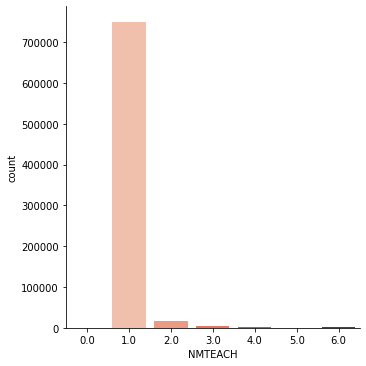

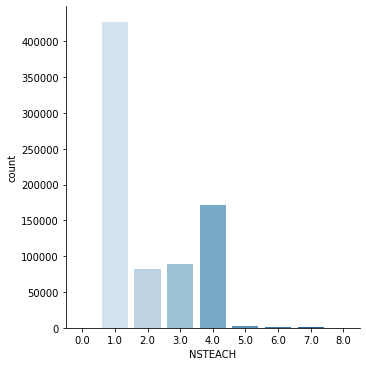

In [48]:
sns.catplot(x='NMTEACH', kind='count', palette='Reds', data=stud_teach);
sns.catplot(x='NSTEACH', kind='count', palette='Blues', data=stud_teach);

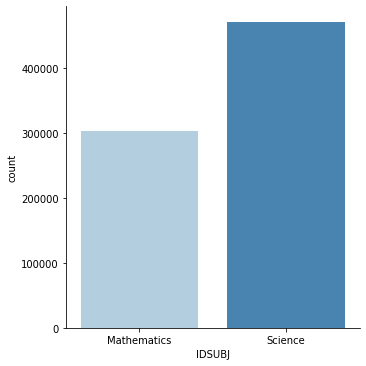

In [49]:
sns.catplot(x="IDSUBJ", kind="count", palette="Blues", data=stud_teach);

**Initial Observations about `stud_teach` dataset:**
* students are morel likey to have multiple science teachers than multiple math teachers
* there are more science teachers in the study than math teachers

**`stud_teach` Data Preparation**
* drop unnecessary columns
* convert IDCNTRY, IDSCHOOL, IDCLASS, IDSTUD, IDTEALIN, IDTEACH, IDLINK, NMTEACH, NSTEACH to integers
* trim and convert IDGRADE to integers

In [50]:
math_teach.head()

,IDCNTRY,IDSCHOOL,IDTEALIN,IDTEACH,IDLINK,ITCOURSE,BTBG01,BTBG02,BTBG03,BTBG04,BTBG05A,BTBG05B,BTBG05C,BTBG05D,BTBG05E,BTBG05F,BTBG05G,BTBG05H,BTBG05I,BTBG06A,BTBG06B,BTBG06C,BTBG06D,BTBG06E,BTBG06F,BTBG06G,BTBG06H,BTBG06I,BTBG06J,BTBG06K,BTBG06L,BTBG07A,BTBG07B,BTBG07C,BTBG07D,BTBG07E,BTBG07F,BTBG07G,BTBG07H,BTBG08A,BTBG08B,BTBG08C,BTBG08D,BTBG08E,BTBG09A,BTBG09B,BTBG09C,BTBG09D,BTBG09E,BTBG09F,BTBG09G,BTBG09H,BTBG10,BTBG11,BTBG12A,BTBG12B,BTBG12C,BTBG12D,BTBG12E,BTBG12F,BTBG12G,BTBG13A,BTBG13B,BTBG13C,BTBG13D,BTBG13E,BTBG13F,BTBG13G,BTBG13H,BTBM14,BTBM15A,BTBM15B,BTBM15C,BTBM15D,BTBM15E,BTBM15F,BTBM15G,BTBM15H,BTBM16,BTBM17A,BTBM17BA,BTBM17BB,BTBM17BC,BTBM17CA,BTBM17CB,BTBM17CC,BTBM17CD,BTBM18AA,BTBM18AB,BTBM18AC,BTBM18BA,BTBM18BB,BTBM18BC,BTBM18BD,BTBM18BE,BTBM18BF,BTBM18BG,BTBM18CA,BTBM18CB,BTBM18CC,BTBM18CD,BTBM18CE,BTBM18CF,BTBM18DA,BTBM18DB,BTBM18DC,BTBM18DD,BTBM18DE,BTBM18DF,BTBM19A,BTBM19B,BTBM19CA,BTBM19CB,BTBM19CC,BTBM19CD,BTBM19CE,BTBM20A,BTBM20B,BTBM20C,BTBM20D,BTBM20E,BTBM21,BTBM22AA,BTBM22BA,BTBM22AB,BTBM22BB,BTBM22AC,BTBM22BC,BTBM22AD,BTBM22BD,BTBM22AE,BTBM22BE,BTBM22AF,BTBM22BF,BTBM22AG,BTBM22BG,BTBM23,IDPOP,IDGRADER,IDGRADE,IDSUBJ,ITLANG_T,LCID_T,BTBGEAS,BTBGLSN,BTBGSOS,BTBGTJS,BTDGEAS,BTDGLSN,BTDGSOS,BTDGTJS,BTDMMME,BTDMNUM,BTDMALG,BTDMGEO,BTDMDAT,VERSION
0,7842.0,5001.0,50010101.0,500101.0,1.0,Mathematics,17.0,Male,40–49,<Master’s or equivalent level—ISCED Level 7>,Yes,No,Yes,Yes,No,Yes,Yes,No,No,Very high,Very high,High,Very high,Low,Low,Low,Medium,Medium,Medium,High,Very high,Agree a lot,Agree a lot,Agree a lot,Agree a little,Agree a lot,Agree a little,Agree a lot,Agree a lot,Very often,Very often,Very often,Very often,Very often,Disagree a lot,Disagree a little,Agree a little,Disagree a lot,Disagree a lot,Disagree a lot,Disagree a lot,Disagree a little,40.0,18.0,Every or almost every lesson,Every or almost every lesson,Every or almost every lesson,Every or almost every lesson,Every or almost every lesson,Every or almost every lesson,Every or almost every lesson,A lot,Not at all,Not at all,Some,A lot,Some,Some,Not at all,NaN,Every or almost every lesson,Every or almost every lesson,About half the lessons,Never,Every or almost every lesson,Every or almost every lesson,Every or almost every lesson,Never,"Yes, with restricted use",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly taught before this year,Mostly taught before this year,Mostly taught before this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught before this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Every day,15 minutes or less,Always or almost always,Never or almost never,Sometimes,Always or almost always,Sometimes,A lot,A lot,Some,Some,Some,More than once a month,Yes,No,Yes,No,Yes,No,Yes,No,Yes,No,Yes,No,Yes,No,16–35 hours,Pop 2,Upper Grade,Grade 8,Mathematics,English,English (U.A.E. Abu Dhabi),10.05102,9.61910,11.78998,11.74559,High Emphasis,Somewhat Limited,Very Safe and Orderly,Very Satisfied,Major in Mathematics and Mathematics Education,100.0,100.00000,100.00000,100.00000,4.0
1,7842.0,5001.0,50010102.0,500101.0,2.0,Mathematics,17.0,Male,40–49,<Master’s or equivalent level—ISCED Level 7>,Yes,No,Yes,Yes,No,Yes,Yes,No,No,Very high,Very high,High,Very high,Low,Low,Low,Medium,Medium,Medium,High,Very high,Agree a lot,Agree a lot,Agree a lot,Agree a little,Agree a lot,Agree a little,Agree a lot,Agree a lot,Very often,Very often,Very often,Very often,Very often,Disagree a lot,Disagree a little,Agree a little,Disagree a lot,Disagree a lot,Disagree a lot,Disagree a lot,Disagree a little,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [51]:
math_teach_drop_new = list(math_teach.columns[math_teach.isna().all()])+list(math_teach.columns[math_teach.nunique()==1])

In [52]:
math_teach_drop_new = math_teach_drop_new + ['LCID_T']

In [53]:
math_teach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14571 entries, 0 to 14570
Columns: 157 entries, IDCNTRY to VERSION
dtypes: float64(18), object(139)
memory usage: 17.5+ MB


In [54]:
math_teach.describe()

,IDCNTRY,IDSCHOOL,IDTEALIN,IDTEACH,IDLINK,BTBG01,BTBG10,BTBG11,BTBM14,BTBGEAS,BTBGLSN,BTBGSOS,BTBGTJS,BTDMNUM,BTDMALG,BTDMGEO,BTDMDAT,VERSION
count,14571.000000,14571.000000,1.457100e+04,14571.000000,14571.000000,13427.000000,13090.000000,12817.000000,12736.000000,13443.000000,13198.000000,13376.000000,13421.000000,13195.000000,13189.000000,13174.000000,13149.000000,14571.0
mean,25861.760483,5139.824583,5.139846e+07,513984.606959,2.316039,15.726000,26.273415,3.074744,228.827418,10.264284,9.850015,10.420642,9.971230,98.147026,70.822475,76.294342,59.566127,4.0
std,127761.944314,125.107698,1.251051e+06,12510.510896,4.010638,10.505881,10.450771,6.940515,78.152219,2.174719,1.996385,2.154510,1.793995,8.467915,24.651900,23.014936,35.533852,0.0
min,36.000000,5001.000000,5.001010e+07,500101.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.873410,3.623690,4.426320,5.281180,0.000000,0.000000,0.000000,0.000000,4.0
25%,372.000000,5055.000000,5.055010e+07,505501.000000,1.000000,7.000000,20.000000,0.000000,180.000000,8.846900,8.632380,8.783370,8.482860,100.000000,57.142860,66.666670,33.333330,4.0
50%,554.000000,5108.000000,5.108050e+07,510805.000000,1.000000,14.000000,26.000000,0.000000,225.000000,10.051020,9.619100,10.072630,10.258740,100.000000,71.428570,83.333330,66.666670,4.0
75%,784.000000,5177.000000,5.177010e+07,517701.000000,3.000000,23.000000,31.000000,3.000000,270.000000,11.550050,11.288280,11.789980,11.745590,100.000000,100.000000,100.000000,100.000000,4.0
max,710004.000000,5631.000000,5.631020e+07,563102.000000,51.000000,59.000000,118.000000,105.000000,700.000000,17.780680,15.295110,13.870350,11.745590,100.000000,100.000000,100.000000,100.000000,4.0


In [55]:
math_teach_codes.loc[[col for col in math_teach.columns if 'BTBG' not in col],:]

,Label
Variable,
IDCNTRY,Country ID - Numeric ISO Code
IDSCHOOL,School ID
IDTEALIN,Teacher ID and Link
IDTEACH,Teacher ID
IDLINK,Teacher Link Number
ITCOURSE,Subject Code in instrument
BTBM14,MATH\TIME SPENT MATH INSTR MINUTES
BTBM15A,MATH\ASK STUDENTS\EXPLAIN NEW CONTENT
BTBM15B,MATH\ASK STUDENTS\EXPLAIN HOW TO SOLVE


In [56]:
math_teach.dtypes

IDCNTRY     float64
IDSCHOOL    float64
IDTEALIN    float64
IDTEACH     float64
IDLINK      float64
             ...   
BTDMNUM     float64
BTDMALG     float64
BTDMGEO     float64
BTDMDAT     float64
VERSION     float64
Length: 157, dtype: object

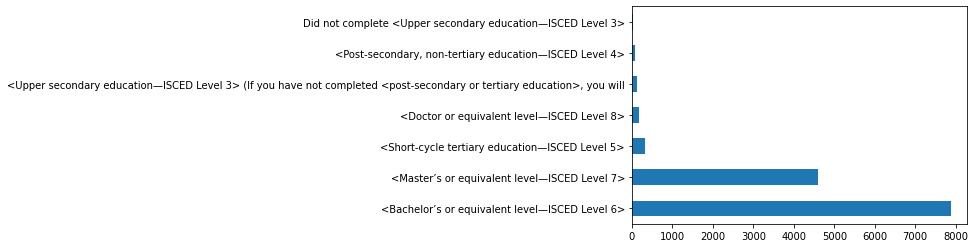

In [57]:
math_teach['BTBG04'].value_counts().plot(kind='barh');

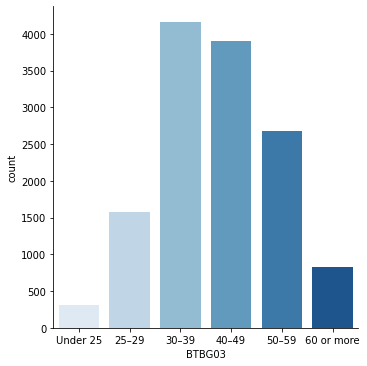

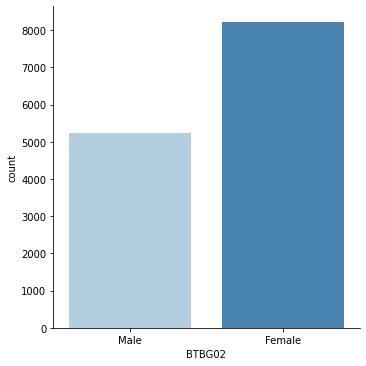

In [58]:
cat_type = CategoricalDtype(categories=['Under 25', '25–29', '30–39', '40–49', '50–59', '60 or more'], ordered=True)
math_teach['BTBG03'] = math_teach['BTBG03'].astype(cat_type)
sns.catplot(x='BTBG03', kind='count', palette='Blues', data=math_teach);
sns.catplot(x='BTBG02', kind='count', palette='Blues', data=math_teach);

**Initial Observations about `math_teach` dataset:**
* Approximately Normal distribution of teacher ages
* Teach education is highly concentrated in the Bachelor's and Master's level
* Significantly more female teacher than males

**`math_teach` Data Preparation**
* drop unnecessary columns
* convert IDCNTRY, IDSCHOOL, IDTEALIN, IDTEACH, IDLINK to integers
* trim and convert BTBG04 to ordered categoricals (ISCED level)
* convert to integer and combine BTBG05* columns to study_stem_edu column
* drop BTBG06* columns because already summarized in BTBGEAS
* drop BTBG07* columns because already summarized in BTBGSOS
* drop BTBG08* columns because already summarized in BTBGTJS
* convert to integer scale BTBG09* columns for comparing teaching environments
* convert to integer scale BTBG12* columns for tracking effectiveness of teacher practices
* drop BTBG13* columns because already summarized in BTBGLSN
* convert to integer scale BTBM15* columns for tracking effectiveness of teacher practices
* convert to integer scale BTBM17* columns for tracking effectiveness of computer access
* drop BTBM18* columns because already summarized in BTDMNUM, BTDMALG, BTDMGEO, BTDMDAT
* convert to integer scale BTBM19* columns for tracking effectiveness of homework practices
* convert to integer scale BTBM20* columns for tracking effectiveness of assessment practices
* drop BTBM22* columns because alreadys summarized in BTBM23
* convert BTDGEAS, BTDGLSN, BTDGSOS, BTDGTJS columns to ordered categoricals
* rename all columns to be more descriptive
* merge with average student performance by teacher

In [59]:
sci_teach.head()

,IDCNTRY,IDSCHOOL,IDTEALIN,IDTEACH,IDLINK,ITCOURSE,BTBG01,BTBG02,BTBG03,BTBG04,BTBG05A,BTBG05B,BTBG05C,BTBG05D,BTBG05E,BTBG05F,BTBG05G,BTBG05H,BTBG05I,BTBG06A,BTBG06B,BTBG06C,BTBG06D,BTBG06E,BTBG06F,BTBG06G,BTBG06H,BTBG06I,BTBG06J,BTBG06K,BTBG06L,BTBG07A,BTBG07B,BTBG07C,BTBG07D,BTBG07E,BTBG07F,BTBG07G,BTBG07H,BTBG08A,BTBG08B,BTBG08C,BTBG08D,BTBG08E,BTBG09A,BTBG09B,BTBG09C,BTBG09D,BTBG09E,BTBG09F,BTBG09G,BTBG09H,BTBG10,BTBG11,BTBG12A,BTBG12B,BTBG12C,BTBG12D,BTBG12E,BTBG12F,BTBG12G,BTBG13A,BTBG13B,BTBG13C,BTBG13D,BTBG13E,BTBG13F,BTBG13G,BTBG13H,BTBS14,BTBS15A,BTBS15B,BTBS15C,BTBS15D,BTBS15E,BTBS15F,BTBS15G,BTBS15H,BTBS15I,BTBS15J,BTBS15K,BTBS15L,BTBS15M,BTBS15N,BTBS16A,BTBS16BA,BTBS16BB,BTBS16BC,BTBS16CA,BTBS16CB,BTBS16CC,BTBS16CD,BTBS17AA,BTBS17AB,BTBS17AC,BTBS17AD,BTBS17AE,BTBS17AF,BTBS17AG,BTBS17BA,BTBS17BB,BTBS17BC,BTBS17BD,BTBS17BE,BTBS17BF,BTBS17BG,BTBS17BH,BTBS17CA,BTBS17CB,BTBS17CC,BTBS17CD,BTBS17CE,BTBS17CF,BTBS17CG,BTBS17DA,BTBS17DB,BTBS17DC,BTBS17DD,BTBS18A,BTBS18B,BTBS18CA,BTBS18CB,BTBS18CC,BTBS18CD,BTBS18CE,BTBS19A,BTBS19B,BTBS19C,BTBS19D,BTBS19E,BTBS20,BTBS21AA,BTBS21BA,BTBS21AB,BTBS21BB,BTBS21AC,BTBS21BC,BTBS21AD,BTBS21BD,BTBS21AE,BTBS21BE,BTBS21AF,BTBS21BF,BTBS21AG,BTBS21BG,BTBS22,IDPOP,IDGRADER,IDGRADE,IDSUBJ,ITLANG_T,LCID_T,BTBGEAS,BTBGLSN,BTBGSOS,BTBGTJS,BTBSESI,BTDGEAS,BTDGLSN,BTDGSOS,BTDGTJS,BTDSESI,BTDSMSE,BTDSBIO,BTDSCHE,BTDSPHY,BTDSEAR,VERSION
0,7842.0,5001.0,50010203.0,500102.0,3.0,Integrated science,30.0,Male,50–59,<Master’s or equivalent level—ISCED Level 7>,No,Yes,Yes,Yes,Yes,No,Yes,No,No,High,High,Medium,High,Medium,Low,High,Low,Medium,Medium,Medium,Very high,Agree a lot,Agree a lot,Agree a lot,Agree a little,Agree a little,Agree a lot,Agree a lot,Agree a lot,Very often,Very often,Very often,Very often,Very often,Agree a little,Agree a lot,Agree a lot,Agree a little,Agree a lot,Agree a lot,Disagree a lot,Agree a little,38.0,20.0,Every or almost every lesson,About half the lessons,Some lessons,Some lessons,Every or almost every lesson,Every or almost every lesson,Every or almost every lesson,Some,Not at all,Not at all,Not at all,Some,Some,Some,Not at all,200.0,Every or almost every lesson,About half the lessons,About half the lessons,Every or almost every lesson,About half the lessons,Every or almost every lesson,Every or almost every lesson,Every or almost every lesson,Every or almost every lesson,About half the lessons,Every or almost every lesson,Some lessons,About half the lessons,Some lessons,Yes,No,Yes,Yes,Once or twice a week,Once or twice a week,Every or almost every day,Once or twice a week,Mostly taught this year,Mostly taught before this year,Mostly taught this year,Mostly taught before this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught before this year,Mostly taught before this year,Mostly taught this year,Mostly taught this year,Mostly taught before this year,Not yet taught or just introduced,Mostly taught this year,Mostly taught this year,Mostly taught before this year,Mostly taught before this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught before this year,Mostly taught before this year,3 or 4 times a week,15 minutes or less,Always or almost always,Sometimes,Always or almost always,Always or almost always,Sometimes,A lot,A lot,A lot,Some,Some,More than once a month,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,16–35 hours,Pop 2,Upper Grade,Grade 8,Science,English,English (U.A.E. Abu Dhabi),9.14714,11.28828,11.78998,11.74559,12.43721,Medium Emphasis,Not Limited,Very Safe and Orderly,Very Satisfied,About Half the Lessons or More,Major in Science and Science Education,100.00000,87.5,100.00000,100.0,4.0
1,7842.0,5001.0,50010204.0,500102.0,4.0,Integrated science,30.0,Male,50–59,<Master’s or equivalent level—ISCED Level 7>,No,Yes,Yes,Yes,Yes,No,Yes,No,No,High,High,Medium,High,Medium,Low,High,Low,Mediu

In [60]:
sci_teach_drop_new = list(sci_teach.columns[sci_teach.isna().all()])+list(sci_teach.columns[sci_teach.nunique()==1])

In [61]:
sci_teach_drop_new = sci_teach_drop_new + ['LCID_T']

In [62]:
sci_teach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22648 entries, 0 to 22647
Columns: 168 entries, IDCNTRY to VERSION
dtypes: float64(19), object(149)
memory usage: 29.0+ MB


In [63]:
sci_teach_codes.loc[[col for col in sci_teach.columns if 'BTBG' not in col],:].iloc[5:,:]

,Label
Variable,
ITCOURSE,Subject Code in instrument
BTBS14,SCI\TIME SPENT SCI INSTR MINUTES
BTBS15A,SCI\ASK STUDENTS\EXPLAIN NEW CONTENT
BTBS15B,SCI\ASK STUDENTS\OBSERVE PHENOMENA
BTBS15C,SCI\ASK STUDENTS\DEMONSTRATE EXPERIMENT
BTBS15D,SCI\ASK STUDENTS\PLAN EXPERIMENTS
BTBS15E,SCI\ASK STUDENTS\CONDUCT EXPERIMENTS
BTBS15F,SCI\ASK STUDENTS\PRESENT DATA
BTBS15G,SCI\ASK STUDENTS\INTERPRET DATA


In [64]:
sci_teach.describe()

,IDCNTRY,IDSCHOOL,IDTEALIN,IDTEACH,IDLINK,BTBG01,BTBG10,BTBG11,BTBS14,BTBGEAS,BTBGLSN,BTBGSOS,BTBGTJS,BTBSESI,BTDSBIO,BTDSCHE,BTDSPHY,BTDSEAR,VERSION
count,22648.000000,22648.000000,2.264800e+04,22648.000000,22648.000000,20738.000000,20234.000000,19792.000000,19816.000000,20855.000000,20440.000000,20700.000000,20794.000000,20561.000000,12694.000000,12809.000000,12849.000000,11876.000000,22648.0
mean,31454.742759,5130.338661,5.130378e+07,513037.700371,5.529981,16.965956,25.370515,2.941188,139.375101,10.238353,10.030577,10.444209,9.826156,9.646790,74.968790,75.931311,70.421378,73.435921,4.0
std,139064.866672,112.485862,1.124852e+06,11248.526185,8.923136,11.146168,9.939160,7.179479,78.428047,2.104111,1.979319,2.116645,1.815395,2.190059,23.169797,23.687424,25.143445,34.276024,0.0
min,36.000000,5001.000000,5.001010e+07,500101.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.873410,3.623690,4.426320,5.281180,6.513090,0.000000,0.000000,0.000000,0.000000,4.0
25%,348.000000,5053.000000,5.053071e+07,505307.000000,2.000000,8.000000,20.000000,0.000000,90.000000,8.846900,8.632380,8.783370,8.482860,8.038700,57.142860,62.500000,57.142860,50.000000,4.0
50%,458.000000,5106.000000,5.106030e+07,510603.000000,3.000000,15.000000,25.000000,0.000000,120.000000,10.051020,10.145090,10.072630,10.258740,9.836960,71.428570,75.000000,71.428570,100.000000,4.0
75%,752.000000,5169.000000,5.169020e+07,516902.000000,5.000000,25.000000,30.000000,3.000000,180.000000,11.550050,11.288280,11.789980,11.745590,10.968860,100.000000,100.000000,100.000000,100.000000,4.0
max,710004.000000,5631.000000,5.631030e+07,563103.000000,53.000000,60.000000,117.000000,111.000000,700.000000,17.780680,15.295110,13.870350,11.745590,16.032560,100.000000,100.000000,100.000000,100.000000,4.0


In [65]:
sci_teach.dtypes

IDCNTRY     float64
IDSCHOOL    float64
IDTEALIN    float64
IDTEACH     float64
IDLINK      float64
             ...   
BTDSBIO     float64
BTDSCHE     float64
BTDSPHY     float64
BTDSEAR     float64
VERSION     float64
Length: 168, dtype: object

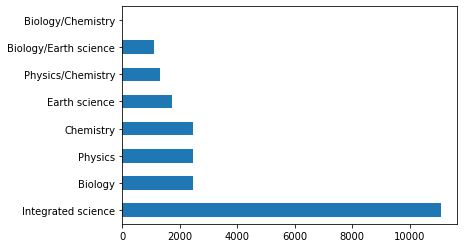

In [66]:
sci_teach['ITCOURSE'].value_counts().plot(kind='barh');

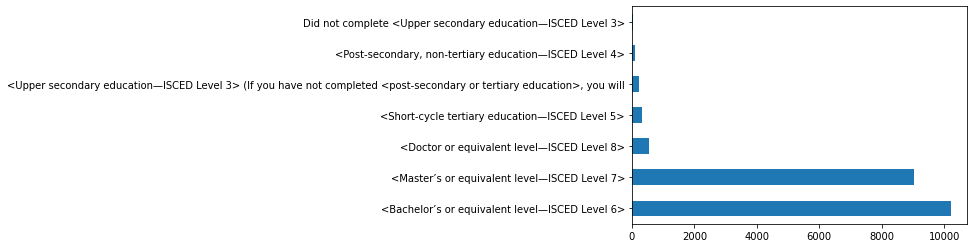

In [67]:
sci_teach['BTBG04'].value_counts().plot(kind='barh');

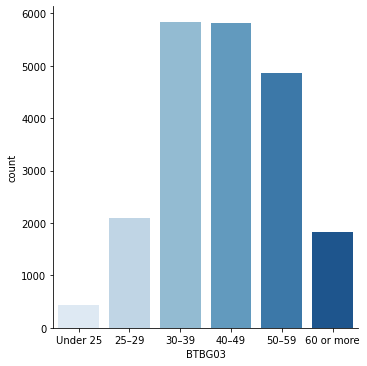

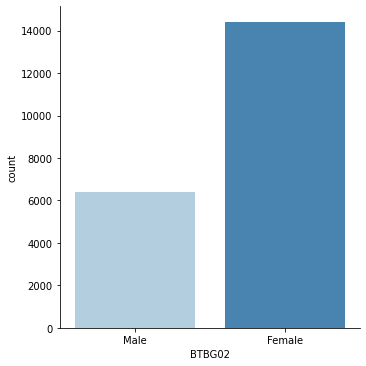

In [68]:
cat_type = CategoricalDtype(categories=['Under 25', '25–29', '30–39', '40–49', '50–59', '60 or more'], ordered=True)
sci_teach['BTBG03'] = sci_teach['BTBG03'].astype(cat_type)
sns.catplot(x='BTBG03', kind='count', palette='Blues', data=sci_teach);
sns.catplot(x='BTBG02', kind='count', palette='Blues', data=sci_teach);

**Initial Observations about `sci_teach` dataset:**
* Approximately Normal distribution of teacher ages (slightly older than math teachers)
* Teach education is highly concentrated in the Bachelor's and Master's level (slightly more educated that math teachers)
* Significantly more female teacher than males (more significant difference than math teachers)
* Most schools offer Integrated Science as compared to specific disciplines

**`sci_teach` Data Preparation**
* drop unnecessary columns
* convert IDCNTRY, IDSCHOOL, IDTEALIN, IDTEACH, IDLINK to integers
* trim and convert BTBG04 to ordered categoricals (ISCED level)
* convert to integer and combine BTBG05* columns to study_stem_edu column
* drop BTBG06* columns because already summarized in BTBGEAS
* drop BTBG07* columns because already summarized in BTBGSOS
* drop BTBG08* columns because already summarized in BTBGTJS
* convert to integer scale BTBG09* columns for comparing teaching environments
* convert to integer scale BTBG12* columns for tracking effectiveness of teacher practices
* drop BTBG13* columns because already summarized in BTBGLSN
* convert to integer scale BTBS15* columns for tracking effectiveness of teacher practices
* convert to integer scale BTBS16* columns for tracking effectiveness of computer access
* drop BTBS17* columns because already summarized in BTDSBIO, BTDSCHE, BTDSPHY, BTDSEAR
* convert to integer scale BTBS18* columns for tracking effectiveness of homework practices
* convert to integer scale BTBS19* columns for tracking effectiveness of assessment practices
* drop BTBS21* columns because alreadys summarized in BTBM22
* convert BTDGEAS, BTDGLSN, BTDGSOS, BTDGTJS, BTDSESI columns to ordered categoricals
* rename all columns to be more descriptive
* merge with average student performance by teacher

[Return to Top](#top)

<div id='data_preparation'></div>

# Data Preparation

Jump to:
1. [`stud_ach Preparation`](#prep1)
1. [`school Preparation`](#prep2)
1. [`student Preparation`](#prep3)
1. [`stud_teach Preparation`](#prep4)
1. [`math_teach Preparation`](#prep5)
1. [`sci_teach Preparation`](#prep6)

[Return to Top of Data Preparation](#data_preparation)

<div id='prep1'></div>

**`stud_ach` Data Preparation**
* ~~drop unnecessary (or null) columns~~
* ~~convert IDCNTRY, IDSCHOOL, IDCLASS, IDSTUD to integers~~
* ~~trim and convert IDBOOK, IDGRADE to integer~~
* ~~rename all columns to be more descriptive~~

#### Define
* drop unnecessary (or null) columns

#### Code

In [69]:
stud_ach.drop(columns=stud_ach_drop_new, inplace=True)
stud_ach.drop(columns=['LCID_SA'], inplace=True)

#### Test

In [70]:
set(stud_ach_drop_new) & set(stud_ach.columns)

set()

#### Define
* convert IDCNTRY, IDSCHOOL, IDCLASS, IDSTUD to integers

#### Code

In [71]:
stud_ach['IDCNTRY'] = stud_ach['IDCNTRY'].astype(int)
stud_ach['IDSCHOOL'] = stud_ach['IDSCHOOL'].astype(int)
stud_ach['IDCLASS'] = stud_ach['IDCLASS'].astype(int)
stud_ach['IDSTUD'] = stud_ach['IDSTUD'].astype(int)

#### Test

In [72]:
stud_ach.dtypes[:10]

IDCNTRY          int32
IDBOOK          object
IDSCHOOL         int32
IDCLASS          int32
IDSTUD           int32
IDGRADE         object
ITLANG_SA       object
ITSEX           object
BSDAGE         float64
MP52024_val    float64
dtype: object

#### Define
* trim and convert IDBOOK, IDGRADE to integer

#### Code

In [73]:
stud_ach['IDBOOK'] = stud_ach['IDBOOK'].apply(lambda x: x[-2:]).astype(int)
stud_ach['IDGRADE'] = stud_ach['IDGRADE'].apply(lambda x: x[-1]).astype(int)

#### Test

In [74]:
stud_ach.dtypes[:10]

IDCNTRY          int32
IDBOOK           int32
IDSCHOOL         int32
IDCLASS          int32
IDSTUD           int32
IDGRADE          int32
ITLANG_SA       object
ITSEX           object
BSDAGE         float64
MP52024_val    float64
dtype: object

#### Define
* rename all columns to be more descriptive

#### Code

In [75]:
stud_ach_col_dict = {'ITLANG_SA':'language','IDGRADE':'grade','ITSEX':'sex','BSDAGE':'age','IDBOOK':'test_book'}
stud_ach.rename(columns=stud_ach_col_dict, inplace=True)

#### Test

In [76]:
[col for col in stud_ach.columns if '_avg' not in col and '_val' not in col and '_sd' not in col]

['IDCNTRY',
 'test_book',
 'IDSCHOOL',
 'IDCLASS',
 'IDSTUD',
 'grade',
 'language',
 'sex',
 'age']

[Return to Top of Data Preparation](#data_preparation)

<div id='prep2'></div>

**`school` Data Preparation**
* ~~drop unnecessary columns~~
* ~~convert IDCNTRY, IDSCHOOL to integers~~
* ~~trim and convert IDGRADE to integer~~
* ~~convert BCDGDAS, BCDGEAS, BCDGMRS, BCDGSRS, BCDGSBC to ordered categoricals~~
* ~~rename all columns to be more descriptive~~
* ~~merge with student performance by school~~

#### Define
* Drop repetitive columns from the dataset

#### Code

In [77]:
school.drop(columns=school_drop_new,inplace=True)
school.drop(columns=['LCID_C'], inplace=True)

#### Test

In [78]:
set(school_drop_new) & set(school.columns)

set()

#### Define
* Convert IDCNTRY, IDSCHOOL to integers

#### Code

In [79]:
school['IDCNTRY'] = school['IDCNTRY'].astype(int)
school['IDSCHOOL'] = school['IDSCHOOL'].astype(int)

#### Test

In [80]:
school.dtypes[:5]

IDCNTRY       int32
IDSCHOOL      int32
IDGRADE      object
ITLANG_C     object
BCBGDAS     float64
dtype: object

#### Define
* Trim and convert IDGRADE to integer (8 or 9)

#### Code

In [81]:
school['IDGRADE'] = school['IDGRADE'].apply(lambda x: x[-1]).astype(int)

#### Test

In [82]:
school['IDGRADE'].unique()

array([8, 9])

#### Define
* Convert BCDGDAS, BCDGEAS, BCDGMRS, BCDGSRS, BCDGSBC to ordered categoricals

#### Code

In [83]:
school_indices = ['BCDGDAS', 'BCDGEAS', 'BCDGMRS', 'BCDGSRS', 'BCDGSBC']
for col in school_indices:
    print(school_codes.loc[col,:])
    print(school[col].unique())

Label    School Discipline Problems-Prncpl/IDX
Name: BCDGDAS, dtype: object
['Minor Problems' 'Hardly Any Problems' nan 'Moderate to Severe Problems']
Label    School Emph on Acad Success-Prncpl/IDX
Name: BCDGEAS, dtype: object
['Medium Emphasis' 'High Emphasis' 'Very High Emphasis' nan]
Label    Instr Aff by Mat Res Shortage-Prncpl/IDX
Name: BCDGMRS, dtype: object
['Not Affected' 'Affected' 'Affected A Lot' nan]
Label    Instr Aff by Sci Res Shortage-Prncpl/IDX
Name: BCDGSRS, dtype: object
['Not Affected' 'Affected A Lot' nan 'Affected']
Label    School Composition by Socioeconomic Background
Name: BCDGSBC, dtype: object
['Neither More Affluent nor More Disadvantaged' 'More Affluent'
 'More Disadvantaged' nan]


In [84]:
disc_prob_type = CategoricalDtype(categories=['Hardly Any Problems','Minor Problems','Moderate to Severe Problems'], ordered=True)
school['disc_prob'] = school['BCDGDAS'].astype(disc_prob_type)
acad_emph_type = CategoricalDtype(categories=['Medium Emphasis', 'High Emphasis', 'Very High Emphasis'], ordered=True)
school['acad_emph'] = school['BCDGEAS'].astype(acad_emph_type)
shortage_affect_type = CategoricalDtype(categories=['Not Affected', 'Affected', 'Affected A Lot'], ordered=True)
school['math_shortage'] = school['BCDGMRS'].astype(shortage_affect_type)
school['sci_shortage'] = school['BCDGSRS'].astype(shortage_affect_type)
school_socio_type = CategoricalDtype(categories=['More Disadvantaged', 'Neither More Affluent nor More Disadvantaged', 'More Affluent'], ordered=True)
school['socio_background'] = school['BCDGSBC'].astype(school_socio_type)
school.drop(columns=school_indices, inplace=True)

#### Test

In [85]:
school.dtypes

IDCNTRY                int32
IDSCHOOL               int32
IDGRADE                int32
ITLANG_C              object
BCBGDAS              float64
BCBGEAS              float64
BCBGMRS              float64
BCBGSRS              float64
BCDGTIHY             float64
disc_prob           category
acad_emph           category
math_shortage       category
sci_shortage        category
socio_background    category
dtype: object

#### Define
* rename all columns to be more descriptive

#### Code

In [86]:
school_col_dict = {'BCBGDAS':'disc_prob_score','BCBGEAS':'acad_emph_score','BCBGMRS':'math_shortage_score','BCBGSRS':'sci_shortage_score','BCDGTIHY':'acad_hours','ITLANG_C':'language','IDGRADE':'grade'}
school.rename(columns=school_col_dict,inplace=True)

#### Test

In [87]:
school.columns

Index(['IDCNTRY', 'IDSCHOOL', 'grade', 'language', 'disc_prob_score',
       'acad_emph_score', 'math_shortage_score', 'sci_shortage_score',
       'acad_hours', 'disc_prob', 'acad_emph', 'math_shortage', 'sci_shortage',
       'socio_background'],
      dtype='object')

#### Define
* merge with student performance by school

#### Code

In [88]:
stud_ach.groupby(['IDCNTRY','IDSCHOOL']).mean().loc[:,[col for col in stud_ach.columns if '_avg' in col]]

mmat_avg    ssci_avg    malg_avg    mapp_avg    mdat_avg  \
IDCNTRY IDSCHOOL                                                               
36      5001      512.160420  528.909690  498.302685  521.510511  531.893457   
        5002      500.057398  525.348892  480.069888  501.129069  521.833812   
        5003      525.973490  533.678966  511.335672  529.865375  544.964311   
        5004      568.834716  582.543276  557.924186  572.206090  585.849087   
        5005      458.656151  478.569777  444.118141  460.885134  471.541118   
...                      ...         ...         ...         ...         ...   
710004  5506      452.359804  468.081983  462.101839  455.212580  438.792544   
        5516      602.888115  632.628227  626.841950  597.759074  583.927258   
        5517      419.186459  395.377530  429.928165  421.909539  415.132096   
        5518      386.538689  389.442015  388.189399  390.103950  381.652148   
        5520      540.502919  564.136019  545.918544  536.166104  528.333465   

                    mgeo_avg    mkno_avg    mnum_avg    mrea_avg    sapp_avg  \
IDCNTRY IDSCHOOL                                                               
36      5001      510.723844  506.440412  516.348085  513.322954  536.406658   
        5002      495.260373  493.117152  505.968088  495.033254  533.047731   
        5003      519.626145  517.451107  531.761602  521.959500  538.120939   
        5004      566.528514  552.770096  580.028650  567.582195  587.872312   
        5005      452.514983  450.811446  456.019090  451.648922  481.027424   
...                      ...         ...         ...         ...         ...   
710004  5506      439.539107  445.538925  455.938441  460.605905  473.185123   
        5516      588.903224  607.187292  609.126282  599.514280  629.275423   
        5517      411.644396  413.414427  428.663409  426.951825  410.715863   
        5518      375.569264  366.523464  391.213308  401.814731  394.776448   
        5520      531.399344  534.928037  537.833104  543.095488  579.713074   

                    sbio_avg    sche_avg    sear_avg    skno_avg    sphy_avg  \
IDCNTRY IDSCHOOL                                                               
36      5001      530.658886  514.227199  535.867503  507.441620  528.110842   
        5002      532.758198  512.284051  541.315108  514.368975  529.544135   
        5003      532.310956  526.377450  542.737756  525.064673  537.782550   
        5004      587.439474  577.372379  586.673154  575.790927  580.311813   
        5005      472.061751  452.380780  477.753128  461.967294  475.214976   
...                      ...         ...         ...         ...         ...   
710004  5506      454.353800  471.234008  465.058587  454.253831  465.100969   
        5516      634.215849  644.136851  635.950862  624.911290  613.534277   
        5517      396.357939  404.610874  408.782505  391.827735  407.385845   
        5518      380.595840  378.696205  401.607907  373.246617  386.977013   
        5520      563.955841  571.377793  577.770288  564.587764  559.173107   

                    srea_avg  
IDCNTRY IDSCHOOL              
36      5001      532.552107  
        5002      534.525980  
        5003      537.392486  
        5004      590.738231  
        5005      495.105472  
...                      ...  
710004  5506      473.847294  
        5516      636.991715  
        5517      391.658714  
        5518      383.254652  
        5520      561.533043  

[9397 rows x 16 columns]

In [89]:
school.set_index(['IDCNTRY','IDSCHOOL'])

grade   language  disc_prob_score  acad_emph_score  \
IDCNTRY IDSCHOOL                                                       
7842    5001          8    English          9.79606          7.03177   
        5004          8    English         10.10482          9.56054   
        5006          8    English         10.43939         11.35999   
        5007          8    English         12.80218         13.19357   
        5008          8    English         14.02858         13.19357   
...                 ...        ...              ...              ...   
710004  5506          9    English          8.24184          7.03177   
        5516          9    English         14.02858         16.36222   
        5517          9  Afrikaans          8.41206          8.67341   
        5518          9  Afrikaans          8.08398          7.39368   
        5520          9  Afrikaans         14.02858         16.36222   

                  math_shortage_score  sci_shortage_score  acad_hours  \
IDCNTRY IDSCHOOL                                                        
7842    5001                 14.25596            14.57241  1350.00000   
        5004                 12.92960            14.57241  1680.00000   
        5006                  8.03304             7.45575  1281.00000   
        5007                 12.29366            12.50979  1311.50000   
        5008                  4.23486             4.07624         NaN   
...                               ...                 ...         ...   
710004  5506                  9.41874             9.46956  1172.50000   
        5516                 14.25596            14.57241  1013.25000   
        5517                 10.21426            10.17656  1100.00000   
        5518                  9.62794             9.57915  1061.33333   
        5520                 14.25596            14.57241  1200.00000   

                            disc_prob           acad_emph   math_shortage  \
IDCNTRY IDSCHOOL                                                            
7842    5001           Minor Problems     Medium Emphasis    Not Affected   
        5004           Minor Problems     Medium Emphasis    Not Affected   
        5006           Minor Problems       High Emphasis        Affected   
        5007      Hardly Any Problems  Very High Emphasis    Not Affected   
        5008      Hardly Any Problems  Very High Emphasis  Affected A Lot   
...                               ...                 ...             ...   
710004  5506           Minor Problems     Medium Emphasis        Affected   
        5516      Hardly Any Problems  Very High Emphasis    Not Affected   
        5517           Minor Problems     Medium Emphasis        Affected   
        5518           Minor Problems     Medium Emphasis        Affected   
        5520      Hardly Any Problems  Very High Emphasis    Not Affected   

                    sci_shortage                              socio_background  
IDCNTRY IDSCHOOL                                                                
7842    5001        Not Affected  Neither More Affluent nor More Disadvantaged  
        5004        Not Affected                                 More Affluent  
        5006      Affected A Lot                                 More Affluent  
        5007        Not Affected                                 More Affluent  
        5008      Affected A Lot  Neither More Affluent nor More Disadvantaged  
...                          ...                                           ...  
710004  5506            Affected                            More Disadvantaged  
        5516        Not Affected                                 More Affluent  
        5517            Affected                            More Disadvantaged  
        5518            Affected                            More Disadvantaged  
        5520        Not Affected                                 More Affluent  

[9925 rows x 12 columns]

In [90]:
school = school.set_index(['IDCNTRY','IDSCHOOL']).join(stud_ach.groupby(['IDCNTRY','IDSCHOOL']).mean().loc[:,[col for col in stud_ach.columns if '_avg' in col]], how='left').reset_index()

#### Test

In [91]:
school.columns

Index(['IDCNTRY', 'IDSCHOOL', 'grade', 'language', 'disc_prob_score',
       'acad_emph_score', 'math_shortage_score', 'sci_shortage_score',
       'acad_hours', 'disc_prob', 'acad_emph', 'math_shortage', 'sci_shortage',
       'socio_background', 'mmat_avg', 'ssci_avg', 'malg_avg', 'mapp_avg',
       'mdat_avg', 'mgeo_avg', 'mkno_avg', 'mnum_avg', 'mrea_avg', 'sapp_avg',
       'sbio_avg', 'sche_avg', 'sear_avg', 'skno_avg', 'sphy_avg', 'srea_avg'],
      dtype='object')

[Return to Top of Data Preparation](#data_preparation)

<div id='prep3'></div>

**`student` Data Preparation**
* ~~drop unnecessary columns~~
* ~~convert IDCNTRY, IDSCHOOL, IDCLASS, IDSTUD to integers~~
* ~~trim and convert IDBOOK, IDGRADE to integers~~
* ~~convert to integer and combine BSBG05* columns to home_possession column~~
* ~~convert to string and combine BSBG09* columns to ordered categorical age_immigration column~~
* ~~convert to integer and combine BSBG12* columns to internet_access column~~
* ~~convert BSBG03, BSBG04, BSBG10, BSBG11*, BSDG* columns to ordered categoricals~~
* ~~trim and convert BSBG06A, BSBG06B, BSBG07 to ordered categoricals (ISCED level)~~
* ~~convert BSBG08* to boolean~~
* ~~rename all columns to be more descriptive~~
* ~~merge with student performance~~

#### Define
* drop unnecessary columns

#### Code

In [92]:
student_drop_new = student_drop_new + ['LCID_SQ','ITLANG_SA','LCID_SA']
student.drop(columns=student_drop_new, inplace=True)

#### Test

In [93]:
set(student_drop_new) & set(student.columns)

set()

#### Define
* convert IDCNTRY, IDSCHOOL, IDCLASS, IDSTUD to integers
* trim and convert IDBOOK, IDGRADE to integers

#### Code

In [94]:
student[['IDCNTRY','IDSCHOOL','IDCLASS','IDSTUD']] = student[['IDCNTRY','IDSCHOOL','IDCLASS','IDSTUD']].astype(int)
student['IDBOOK'] = student['IDBOOK'].apply(lambda x: x[-2:]).astype(int)
student['IDGRADE'] = student['IDGRADE'].apply(lambda x: x[-1]).astype(int)

#### Test

In [95]:
student[['IDCNTRY','IDSCHOOL','IDCLASS','IDSTUD','IDBOOK','IDGRADE']].dtypes

IDCNTRY     int32
IDSCHOOL    int32
IDCLASS     int32
IDSTUD      int32
IDBOOK      int32
IDGRADE     int32
dtype: object

#### Define
* convert to integer and combine BSBG05* columns to home_possession column
* convert to integer and combine BSBG12* columns to internet_access column

#### Code

In [96]:
conv_col = {'BSBG05':'home_possession','BSBG12':'internet_access'}
for base_col in conv_col.keys():
    all_cols = [col for col in student.columns if base_col in col]
    for i, single_col in enumerate(all_cols):
        if i == 0:
            student[conv_col[base_col]] = student[single_col].apply(lambda x: np.nan if x!=x else int(x=='Yes')).astype(float)
        else:
            student[conv_col[base_col]] = student[conv_col[base_col]] + student[single_col].apply(lambda x: np.nan if x!=x else int(x=='Yes')).astype(float)
    student.drop(columns=all_cols, inplace=True)

#### Test

In [97]:
student.columns

Index(['IDCNTRY', 'IDBOOK', 'IDSCHOOL', 'IDCLASS', 'IDSTUD', 'BSBG03',
       'BSBG04', 'BSBG06A', 'BSBG06B', 'BSBG07', 'BSBG08A', 'BSBG08B',
       'BSBG09A', 'BSBG09B', 'BSBG10', 'BSBG11A', 'BSBG11B', 'IDGRADE',
       'ITLANG_SQ', 'ITSEX', 'BSDAGE', 'BSBGHER', 'BSDGHER', 'BSBGSSB',
       'BSDGSSB', 'BSBGSB', 'BSDGSB', 'BSBGSLM', 'BSDGSLM', 'BSBGICM',
       'BSDGICM', 'BSBGDML', 'BSDGDML', 'BSBGSCM', 'BSDGSCM', 'BSBGSVM',
       'BSDGSVM', 'BSBGSLS', 'BSDGSLS', 'BSBGICS', 'BSDGICS', 'BSBGSCS',
       'BSDGSCS', 'BSBGSVS', 'BSDGSVS', 'BSBGSLB', 'BSDGSLB', 'BSBGICB',
       'BSDGICB', 'BSBGSCB', 'BSDGSCB', 'BSBGSLE', 'BSDGSLE', 'BSBGICE',
       'BSDGICE', 'BSBGSCE', 'BSDGSCE', 'BSBGSLC', 'BSDGSLC', 'BSBGICC',
       'BSDGICC', 'BSBGSCC', 'BSDGSCC', 'BSBGSLP', 'BSDGSLP', 'BSBGICP',
       'BSDGICP', 'BSBGSCP', 'BSDGSCP', 'BSBGSEC', 'BSDGSEC', 'BSDG05S',
       'BSDGEDUP', 'home_possession', 'internet_access'],
      dtype='object')

In [98]:
student[['home_possession','internet_access']].dtypes

home_possession    float64
internet_access    float64
dtype: object

#### Define
* convert to string and combine BSBG09* columns to ordered categorical age_immigration column

#### Code

In [99]:
for col in [col for col in student.columns if 'BSBG09' in col]:
    print(student[col].unique())

['Yes' 'No' nan]
[nan '5 to 10 years old' 'Younger than 5 years old'
 'Older than 10 years old']


In [100]:
def age_immigration_col(x):
    if x[0] == 'Yes':
        return('Birth')
    else:
        return(x[1])

In [101]:
student['age_immigration'] = student[['BSBG09A','BSBG09B']].apply(age_immigration_col, axis = 1)
student.drop(columns=['BSBG09A','BSBG09B'], inplace=True)

In [102]:
immigration_type = CategoricalDtype(categories=['Birth','Younger than 5 years old','5 to 10 years old', 'Older than 10 years old'], ordered=True)
student['age_immigration'] = student['age_immigration'].astype(immigration_type)

#### Test

In [103]:
student[[col for col in student.columns if 'BSBG09' in col or 'immigration' in col]].dtypes

age_immigration    category
dtype: object

#### Define
* convert BSBG03, BSBG04, BSBG10, BSBG11, BSDG columns to ordered categoricals

#### Code

In [106]:
new_cat_cols = ['BSBG03', 'BSBG04', 'BSBG10', 'BSBG11', 'BSDG']
for col_root in new_cat_cols:
    for col in student.columns:
        if col_root in col:
            print(student[col].unique())
            print(student_codes.loc[col,:])
            #input()

['Almost always' 'Always' nan 'Sometimes' 'Never']
Label    GEN\OFTEN SPEAK <LANG OF TEST> AT HOME
Name: BSBG03, dtype: object
['Enough to fill one shelf (11–25 books)' 'None or very few (0–10 books)'
 nan 'Enough to fill one bookcase (26–100 books)'
 'Enough to fill two bookcases (101–200 books)'
 'Enough to fill three or more bookcases (more than 200)']
Label    GEN\AMOUNT OF BOOKS IN YOUR HOME
Name: BSBG04, dtype: object
['Never or almost never' 'Once a week' 'Once every two month'
 'Once a month' 'Once every two weeks' nan]
Label    GEN\ABOUT HOW OFTEN ABSENT FROM SCHOOL
Name: BSBG10, dtype: object
['Sometimes' 'Every day' 'Almost every day' 'Never' nan]
Label    GEN\HOW OFTEN\TIRED
Name: BSBG11A, dtype: object
['Sometimes' nan 'Every day' 'Never' 'Almost every day']
Label    GEN\HOW OFTEN\HUNGRY
Name: BSBG11B, dtype: object
['Some Resources' 'Few Resources' 'Many Resources' nan]
Label    Home Educational Resources/IDX
Name: BSDGHER, dtype: object
['High Sense of School Belonging' 

In [107]:
info = {}
info['BSBG03'] = {'new_name':'acad_lang_home','ordered_cols':['Never','Sometimes','Almost always','Always']}
info['BSBG04'] = {'new_name':'books','ordered_cols':['None or very few (0–10 books)','Enough to fill one shelf (11–25 books)',
                                                     'Enough to fill one bookcase (26–100 books)','Enough to fill two bookcases (101–200 books)',
                                                     'Enough to fill three or more bookcases (more than 200)']}
info['BSBG10'] = {'new_name':'absent_freq','ordered_cols':['Never or almost never','Once every two month','Once a month','Once every two weeks','Once a week']}
info['BSBG11A'] = {'new_name':'tired_freq','ordered_cols':['Never','Sometimes','Almost every day','Every day']}
info['BSBG11B'] = {'new_name':'hungry_freq','ordered_cols':['Never','Sometimes','Almost every day','Every day']}
info['BSDGHER'] = {'new_name':'home_res','ordered_cols':['Few Resources','Some Resources','Many Resources']}
info['BSDGSSB'] = {'new_name':'belonging','ordered_cols':['Little Sense of School Belonging','Some Sense of School Belonging','High Sense of School Belonging']}
info['BSDGSB'] = {'new_name':'bullying','ordered_cols':['Never or Almost Never','About Monthly','About Weekly']}
info['BSDGSLM'] = {'new_name':'like_math','ordered_cols':['Do Not Like Learning Mathematics','Somewhat Like Learning Mathematics','Very Much Like Learning Mathematics']}
info['BSDGICM'] = {'new_name':'clear_math','ordered_cols':['Low Clarity of Instruction','Moderate Clarity of Instruction','High Clarity of Instruction']}
info['BSDGDML'] = {'new_name':'disorder_math','ordered_cols':['Few or No Lessons','Some Lessons','Most Lessons']}
info['BSDGSCM'] = {'new_name':'confident_math','ordered_cols':['Not Confident in Mathematics','Somewhat Confident in Mathematics','Very Confident in Mathematics']}
info['BSDGSVM'] = {'new_name':'value_math','ordered_cols':['Do Not Value Mathematics','Somewhat Value Mathematics','Strongly Value Mathematics']}
info['BSDGSLS'] = {'new_name':'like_science','ordered_cols':['Do Not Like Learning Science','Somewhat Like Learning Science','Very Much Like Learning Science']}
info['BSDGICS'] = {'new_name':'clear_science','ordered_cols':['Low Clarity of Instruction','Moderate Clarity of Instruction','High Clarity of Instruction']}
info['BSDGSCS'] = {'new_name':'confident_science','ordered_cols':['Not Confident in Science','Somewhat Confident in Science','Very Confident in Science']}
info['BSDGSVS'] = {'new_name':'value_science','ordered_cols':['Do Not Value Science','Somewhat Value Science','Strongly Value Science']}
info['BSDGSLB'] = {'new_name':'like_bio','ordered_cols':['Do Not Like Learning Biology','Somewhat Like Learning Biology','Very Much Like Learning Biology']}
info['BSDGICB'] = {'new_name':'clear_bio','ordered_cols':['Low Clarity of Instruction','Moderate Clarity of Instruction','High Clarity of Instruction']}
info['BSDGSCB'] = {'new_name':'confident_bio','ordered_cols':['Not Confident in Biology','Somewhat Confident in Biology','Very Confident in Biology']}
info['BSDGSLE'] = {'new_name':'like_earth','ordered_cols':['Do Not Like Learning Earth Science','Somewhat Like Learning Earth Science','Very Much Like Learning Earth Science']}
info['BSDGICE'] = {'new_name':'clear_earth','ordered_cols':['Low Clarity of Instruction','Moderate Clarity of Instruction','High Clarity of Instruction']}
info['BSDGSCE'] = {'new_name':'confident_earth','ordered_cols':['Not Confident in Earth Science','Somewhat Confident in Earth Science','Very Confident in Earth Science']}
info['BSDGSLC'] = {'new_name':'like_chem','ordered_cols':['Do Not Like Learning Chemistry','Somewhat Like Learning Chemistry','Very Much Like Learning Chemistry']}
info['BSDGICC'] = {'new_name':'clear_chem','ordered_cols':['Low Clarity of Instruction','Moderate Clarity of Instruction','High Clarity of Instruction']}
info['BSDGSCC'] = {'new_name':'confident_chem','ordered_cols':['Not Confident in Chemistry','Somewhat Confident in Chemistry','Very Confident in Chemistry']}
info['BSDGSLP'] = {'new_name':'like_phys','ordered_cols':['Do Not Like Learning Physics','Somewhat Like Learning Physics','Very Much Like Learning Physics']}
info['BSDGICP'] = {'new_name':'clear_phys','ordered_cols':['Low Clarity of Instruction','Moderate Clarity of Instruction','High Clarity of Instruction']}
info['BSDGSCP'] = {'new_name':'confident_phys','ordered_cols':['Not Confident in Physics','Somewhat Confident in Physics','Very Confident in Physics']}
info['BSDGSEC'] = {'new_name':'confident_computer','ordered_cols':['Low Self-Efficacy','Medium Self-Efficacy','High Self-Efficacy']}
info['BSDG05S'] = {'new_name':'study_support','ordered_cols':['Neither Own Room nor Internet Connection','Either Own Room or Internet Connection','Both Own Room and Internet Connection']}
info['BSDGEDUP'] = {'new_name':'','ordered_cols':['Some Primary, Lower Secondary or No School',
                                                 'Lower Secondary','Upper Secondary','Post-secondary but not University',
                                                 'University or Higher']}

In [112]:
for item in info.keys():
    cat_type = CategoricalDtype(categories=info[item]['ordered_cols'], ordered=True)
    student[item] = student[item].astype(cat_type)
    student.rename(columns={item:info[item]['new_name']},inplace=True)

#### Test

In [123]:
student.loc[:,[col for col in student.columns if col.islower()]].dtypes.sample(10)

confident_earth    category
belonging          category
bullying           category
clear_bio          category
study_support      category
books              category
clear_science      category
clear_chem         category
home_possession     float64
value_math         category
dtype: object

In [127]:
student[random.choice([col for col in student.columns if col.islower()])].unique()

['Enough to fill one shelf (11–25 books)', 'None or very few (0–10 books)', NaN, 'Enough to fill one bookcase (26–100 books)', 'Enough to fill two bookcases (101–200 books)', 'Enough to fill three or more bookcases (more ...]
Categories (5, object): ['None or very few (0–10 books)' < 'Enough to fill one shelf (11–25 books)' < 'Enough to fill one bookcase (26–100 books)' < 'Enough to fill two bookcases (101–200 books)' < 'Enough to fill three or more bookcases (more ...]

#### Define
* trim and convert BSBG06A, BSBG06B, BSBG07 to ordered categoricals (ISCED level)

#### Code

In [165]:
student_codes.loc['BSBG06A']

Label    GEN\HIGHEST LVL OF EDU OF <PARENT/GUARDIAN A>
Name: BSBG06A, dtype: object

In [160]:
def edu_level(val):
    try:
        level = re.search('[0-9]',val).group(0)
        return 'ISCED Level '+level
    except:
        return np.NaN

In [167]:
student['parent_edu_1'] = student['BSBG06A'].apply(edu_level)
student['parent_edu_2'] = student['BSBG06B'].apply(edu_level)
student['desired_edu'] = student['BSBG07'].apply(edu_level)
student.drop(columns=['BSBG06A', 'BSBG06B', 'BSBG07'],inplace=True)

In [186]:
edu_list = list(filter(lambda x: str(x) != 'nan',student['parent_edu_1'].unique()))
edu_list.sort()
edu_type = CategoricalDtype(categories=edu_list, ordered=True)
student['parent_edu_1'] = student['parent_edu_1'].astype(edu_type)
student['parent_edu_2'] = student['parent_edu_2'].astype(edu_type)
student['desired_edu'] = student['desired_edu'].astype(edu_type)

#### Test

In [189]:
for col in [col for col in student.columns if '_edu' in col]:
    print(student.loc[:,col].unique())

['ISCED Level 4', 'ISCED Level 5', NaN, 'ISCED Level 2', 'ISCED Level 6', 'ISCED Level 3', 'ISCED Level 1', 'ISCED Level 7']
Categories (7, object): ['ISCED Level 1' < 'ISCED Level 2' < 'ISCED Level 3' < 'ISCED Level 4' < 'ISCED Level 5' < 'ISCED Level 6' < 'ISCED Level 7']
['ISCED Level 6', 'ISCED Level 5', 'ISCED Level 4', NaN, 'ISCED Level 3', 'ISCED Level 7', 'ISCED Level 2', 'ISCED Level 1']
Categories (7, object): ['ISCED Level 1' < 'ISCED Level 2' < 'ISCED Level 3' < 'ISCED Level 4' < 'ISCED Level 5' < 'ISCED Level 6' < 'ISCED Level 7']
['ISCED Level 6', 'ISCED Level 2', NaN, 'ISCED Level 3', 'ISCED Level 7', 'ISCED Level 5', 'ISCED Level 4']
Categories (6, object): ['ISCED Level 2' < 'ISCED Level 3' < 'ISCED Level 4' < 'ISCED Level 5' < 'ISCED Level 6' < 'ISCED Level 7']


#### Define
* convert BSBG08* to float

#### Code

In [194]:
def immig_status(val):
    if val == "Yes":
        return 1
    elif val == "No":
        return 0
    else:
        return np.nan

In [195]:
student['parent_immig_1'] = student['BSBG08A'].apply(immig_status)
student['parent_immig_2'] = student['BSBG08B'].apply(immig_status)
student.drop(columns=['BSBG08A','BSBG08B'],inplace=True)

#### Test

In [197]:
student['parent_immig_1'].unique()

array([ 1.,  0., nan])

#### Define
* rename all columns to be more descriptive

#### Code

In [204]:
student.head()

,IDCNTRY,IDBOOK,IDSCHOOL,IDCLASS,IDSTUD,acad_lang_home,books,absent_freq,tired_freq,hungry_freq,IDGRADE,ITLANG_SQ,ITSEX,BSDAGE,BSBGHER,home_res,BSBGSSB,belonging,BSBGSB,bullying,BSBGSLM,like_math,BSBGICM,clear_math,BSBGDML,disorder_math,BSBGSCM,confident_math,BSBGSVM,value_math,BSBGSLS,like_science,BSBGICS,clear_science,BSBGSCS,confident_science,BSBGSVS,value_science,BSBGSLB,like_bio,BSBGICB,clear_bio,BSBGSCB,confident_bio,BSBGSLE,like_earth,BSBGICE,clear_earth,BSBGSCE,confident_earth,BSBGSLC,like_chem,BSBGICC,clear_chem,BSBGSCC,confident_chem,BSBGSLP,like_phys,BSBGICP,clear_phys,BSBGSCP,confident_phys,BSBGSEC,confident_computer,study_support,,home_possession,internet_access,age_immigration,parent_edu_1,parent_edu_2,desired_edu,parent_immig_1,parent_immig_2
0,7842,11,5001,500102,50010201,Almost always,Enough to fill one shelf (11–25 books),Never or almost never,Sometimes,Sometimes,8,English,Male,13.58,10.84499,Some Resources,12.80573,High Sense of School Belonging,12.93734,Never or Almost Never,11.75478,Very Much Like Learning Mathematics,10.38389,High Clarity of Instruction,11.40970,Some Lessons,10.35323,Somewhat Confident in Mathematics,10.34734,Strongly Value Mathematics,10.10421,Somewhat Like Learning Science,10.78969,High Clarity of Instruction,11.39185,Very Confident in Science,12.9367,Strongly Value Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.68313,Medium Self-Efficacy,Both Own Room and Internet Connection,University or Higher,9.0,6.0,Birth,ISCED Level 4,ISCED Level 6,ISCED Level 6,1.0,1.0
1,7842,12,5001,500102,50010202,Almost always,Enough to fill one shelf (11–25 books),Never or almost never,Sometimes,Sometimes,8,English,Male,13.75,10.23835,Some Resources,13.27199,High Sense of School Belonging,12.93734,Never or Almost Never,11.42832,Very Much Like Learning Mathematics,10.38389,High Clarity of Instruction,11.10343,Some Lessons,10.35323,Somewhat Confident in Mathematics,10.34734,Strongly Value Mathematics,10.68878,Very Much Like Learning Science,10.78969,High Clarity of Instruction,10.70197,Somewhat Confident in Science,12.9367,Strongly Value Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.52147,Medium Self-Efficacy,Both Own Room and Internet Connection,Post-secondary but not University,9.0,6.0,Birth,ISCED Level 5,ISCED Level 5,ISCED Level 6,1.0,1.0
2,7842,13,5001,500102,50010203,Always,None or very few (0–10 books),Never or almost never,Sometimes,Sometimes,8,English,Male,13.50,9.03613,Some Resources,13.27199,High Sense of School Belonging,12.93734,Never or Almost Never,11.75478,Very Much Like Learning Mathematics,10.38389,High Clarity of Instruction,11.40970,Some Lessons,8.51433,Not Confident in Mathematics,6.48714,Do Not Value Mathematics,10.36663,Somewhat Like Learning Science,10.78969,High Clarity of Instruction,11.39185,Very Confident in Science,12.9367,Strongly Value Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.52551,High Self-Efficacy,Either Own Room or Internet Connection,Post-secondary but not University,5.0,6.0,Birth,NaN,ISCED Level 5,ISCED Level 2,1.0,0.0
3,7842,14,5001,500102,50010204,Almost always,Enough to fill one shelf (11–25 books),Never or almost never,Sometimes,Sometimes,8,English,Male,14.00,10.23835,Some Resources,13.27199,High Sense of School Belonging,12.93734,Never or Almost Never,10.89898,Somewhat Like Learning Mathematics,9.52219,Moderate Clarity of Instruction,11.10343,Some Lessons,10.12116,Somewhat Confident in Mathematics,10.34734,Strongly Value Mathematics,9.97380,Somewhat Like Learning Science,11.43106,High Clarity of Instruction,10.13014,Somewhat Confident in Science,12.9367,Strongly Value Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.25444,Medium Self-Efficacy,Both Own Room and Internet Connection,Post-secondary but not University,9.0,6.0,Birth,ISCED 

In [203]:
str(list([col for col in student.columns if not col.islower()]))

"['IDCNTRY', 'IDBOOK', 'IDSCHOOL', 'IDCLASS', 'IDSTUD', 'IDGRADE', 'ITLANG_SQ', 'ITSEX', 'BSDAGE', 'BSBGHER', 'BSBGSSB', 'BSBGSB', 'BSBGSLM', 'BSBGICM', 'BSBGDML', 'BSBGSCM', 'BSBGSVM', 'BSBGSLS', 'BSBGICS', 'BSBGSCS', 'BSBGSVS', 'BSBGSLB', 'BSBGICB', 'BSBGSCB', 'BSBGSLE', 'BSBGICE', 'BSBGSCE', 'BSBGSLC', 'BSBGICC', 'BSBGSCC', 'BSBGSLP', 'BSBGICP', 'BSBGSCP', 'BSBGSEC', '']"

In [209]:
student_col_dict = {'ITLANG_SQ':'language',
                     'IDGRADE':'grade',
                     'ITSEX':'sex',
                     'BSDAGE':'age',
                     'IDBOOK':'test_book',
                    'BSBGHER':'home_res_score',
                    'BSBGSSB':'belonging_score',
                    'BSBGSB':'bullying_score',
                    'BSBGSLM':'like_math_score',
                    'BSBGICM':'clear_math_score',
                    'BSBGDML':'disorder_math_score',
                    'BSBGSCM':'confident_math_score',
                    'BSBGSVM':'value_math_score',
                    'BSBGSLS':'like_science_score',
                    'BSBGICS':'clear_science_score',
                    'BSBGSCS':'confident_science_score',
                    'BSBGSVS':'value_science_score',
                    'BSBGSLB':'like_bio_score', 
                    'BSBGICB':'clear_bio_score',
                    'BSBGSCB':'confident_bio_score',
                    'BSBGSLE':'like_earth_score',
                    'BSBGICE':'clear_earth_score',
                    'BSBGSCE':'confident_earth_score',
                    'BSBGSLC':'like_chem_score',
                    'BSBGICC':'clear_chem_score',
                    'BSBGSCC':'confident_chem_score',
                    'BSBGSLP':'like_phys_score',
                    'BSBGICP':'clear_phys_score',
                    'BSBGSCP':'confident_phys_score',
                    'BSBGSEC':'confident_computer_score',
                    '':'parent_edu_max'}
student.rename(columns=student_col_dict, inplace=True)

#### Test

In [214]:
student.columns

Index(['IDCNTRY', 'test_book', 'IDSCHOOL', 'IDCLASS', 'IDSTUD',
       'acad_lang_home', 'books', 'absent_freq', 'tired_freq', 'hungry_freq',
       'grade', 'language', 'sex', 'age', 'home_res_score', 'home_res',
       'belonging_score', 'belonging', 'bullying_score', 'bullying',
       'like_math_score', 'like_math', 'clear_math_score', 'clear_math',
       'disorder_math_score', 'disorder_math', 'confident_math_score',
       'confident_math', 'value_math_score', 'value_math',
       'like_science_score', 'like_science', 'clear_science_score',
       'clear_science', 'confident_science_score', 'confident_science',
       'value_science_score', 'value_science', 'like_bio_score', 'like_bio',
       'clear_bio_score', 'clear_bio', 'confident_bio_score', 'confident_bio',
       'like_earth_score', 'like_earth', 'clear_earth_score', 'clear_earth',
       'confident_earth_score', 'confident_earth', 'like_chem_score',
       'like_chem', 'clear_chem_score', 'clear_chem', 'confident_chem_s

#### Define
* merge with student performance

#### Code

In [215]:
student.columns[:8]

Index(['IDCNTRY', 'test_book', 'IDSCHOOL', 'IDCLASS', 'IDSTUD',
       'acad_lang_home', 'books', 'absent_freq'],
      dtype='object')

In [216]:
stud_ach.columns[:8]

Index(['IDCNTRY', 'test_book', 'IDSCHOOL', 'IDCLASS', 'IDSTUD', 'grade',
       'language', 'sex'],
      dtype='object')

In [218]:
student = student.set_index(['IDCNTRY','IDSCHOOL','IDCLASS','IDSTUD']).join(stud_ach.set_index(['IDCNTRY','IDSCHOOL','IDCLASS','IDSTUD']).loc[:,[col for col in stud_ach.columns if '_avg' in col]], how='left').reset_index()

#### Test

In [219]:
student.head()

,IDCNTRY,IDSCHOOL,IDCLASS,IDSTUD,test_book,acad_lang_home,books,absent_freq,tired_freq,hungry_freq,grade,language,sex,age,home_res_score,home_res,belonging_score,belonging,bullying_score,bullying,like_math_score,like_math,clear_math_score,clear_math,disorder_math_score,disorder_math,confident_math_score,confident_math,value_math_score,value_math,like_science_score,like_science,clear_science_score,clear_science,confident_science_score,confident_science,value_science_score,value_science,like_bio_score,like_bio,clear_bio_score,clear_bio,confident_bio_score,confident_bio,like_earth_score,like_earth,clear_earth_score,clear_earth,confident_earth_score,confident_earth,like_chem_score,like_chem,clear_chem_score,clear_chem,confident_chem_score,confident_chem,like_phys_score,like_phys,clear_phys_score,clear_phys,confident_phys_score,confident_phys,confident_computer_score,confident_computer,study_support,parent_edu_max,home_possession,internet_access,age_immigration,parent_edu_1,parent_edu_2,desired_edu,parent_immig_1,parent_immig_2,mmat_avg,ssci_avg,malg_avg,mapp_avg,mdat_avg,mgeo_avg,mkno_avg,mnum_avg,mrea_avg,sapp_avg,sbio_avg,sche_avg,sear_avg,skno_avg,sphy_avg,srea_avg
0,7842,5001,500102,50010201,11,Almost always,Enough to fill one shelf (11–25 books),Never or almost never,Sometimes,Sometimes,8,English,Male,13.58,10.84499,Some Resources,12.80573,High Sense of School Belonging,12.93734,Never or Almost Never,11.75478,Very Much Like Learning Mathematics,10.38389,High Clarity of Instruction,11.40970,Some Lessons,10.35323,Somewhat Confident in Mathematics,10.34734,Strongly Value Mathematics,10.10421,Somewhat Like Learning Science,10.78969,High Clarity of Instruction,11.39185,Very Confident in Science,12.9367,Strongly Value Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.68313,Medium Self-Efficacy,Both Own Room and Internet Connection,University or Higher,9.0,6.0,Birth,ISCED Level 4,ISCED Level 6,ISCED Level 6,1.0,1.0,550.550842,480.099946,517.042408,502.836180,485.677994,508.168950,527.618686,535.162198,517.203196,459.227332,404.517518,443.350576,412.148076,471.580088,450.679538,464.316504
1,7842,5001,500102,50010202,12,Almost always,Enough to fill one shelf (11–25 books),Never or almost never,Sometimes,Sometimes,8,English,Male,13.75,10.23835,Some Resources,13.27199,High Sense of School Belonging,12.93734,Never or Almost Never,11.42832,Very Much Like Learning Mathematics,10.38389,High Clarity of Instruction,11.10343,Some Lessons,10.35323,Somewhat Confident in Mathematics,10.34734,Strongly Value Mathematics,10.68878,Very Much Like Learning Science,10.78969,High Clarity of Instruction,10.70197,Somewhat Confident in Science,12.9367,Strongly Value Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.52147,Medium Self-Efficacy,Both Own Room and Internet Connection,Post-secondary but not University,9.0,6.0,Birth,ISCED Level 5,ISCED Level 5,ISCED Level 6,1.0,1.0,326.129702,318.662552,323.233832,356.545632,302.030198,328.756934,352.864178,355.017696,385.102162,315.159308,295.509340,324.683132,343.312374,323.550294,343.942730,315.274280
2,7842,5001,500102,50010203,13,Always,None or very few (0–10 books),Never or almost never,Sometimes,Sometimes,8,English,Male,13.50,9.03613,Some Resources,13.27199,High Sense of School Belonging,12.93734,Never or Almost Never,11.75478,Very Much Like Learning Mathematics,10.38389,High Clarity of Instruction,11.40970,Some Lessons,8.51433,Not Confident in Mathematics,6.48714,Do Not Value Mathematics,10.36663,Somewhat Like Learning Science,10.78969,High Clarity of Instruction,11.39185,Very Confident in Science,12.9367,Strongly Value Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.52551,High Self-Efficacy,Either Own Room or Internet Connection,Post-secondary but not University,5.0,6.0,Birth,NaN,ISCED Level 5,ISCED Level 2,1.0,0.0,393.169444,328.771868,4

[Return to Top of Data Preparation](#data_preparation)

<div id='prep4'></div>

**`stud_teach` Data Preparation**
* ~~drop unnecessary columns~~
* ~~convert IDCNTRY, IDSCHOOL, IDCLASS, IDSTUD, IDTEALIN, IDTEACH, IDLINK, NMTEACH, NSTEACH to integers~~
* ~~trim and convert IDGRADE to integers~~

#### Define
* drop unnecessary columns

#### Code

In [222]:
stud_teach.drop(columns=stud_teach_drop_new, inplace=True)

#### Test

In [223]:
set(stud_teach_drop_new) & set(stud_teach.columns)

set()

#### Define
* trim and convert IDGRADE to integers

#### Code

In [224]:
stud_teach['IDGRADE'] = stud_teach['IDGRADE'].apply(lambda x: x[-1]).astype(int)

#### Test

In [225]:
stud_teach['IDGRADE']

0         8
1         8
2         8
3         8
4         8
         ..
775674    9
775675    9
775676    9
775677    9
775678    9
Name: IDGRADE, Length: 775679, dtype: int32

#### Define
* convert IDCNTRY, IDSCHOOL, IDCLASS, IDSTUD, IDGRADE, IDTEALIN, IDTEACH, IDLINK, NMTEACH, NSTEACH to integers

#### Code

In [231]:
int_cols = ['IDCNTRY', 'IDSCHOOL', 'IDCLASS', 'IDSTUD', 'IDGRADE', 'IDTEALIN', 'IDTEACH', 'IDLINK', 'NMTEACH', 'NSTEACH']
for col in int_cols:
    stud_teach[col] = stud_teach[col].apply(lambda x: int(x) if x==x else 0)

#### Test

In [232]:
stud_teach.loc[:,int_cols].dtypes

IDCNTRY     int64
IDSCHOOL    int64
IDCLASS     int64
IDSTUD      int64
IDGRADE     int64
IDTEALIN    int64
IDTEACH     int64
IDLINK      int64
NMTEACH     int64
NSTEACH     int64
dtype: object

[Return to Top of Data Preparation](#data_preparation)

<div id='prep5'></div>

**`math_teach` Data Preparation**
* ~~drop unnecessary columns~~
* ~~convert IDCNTRY, IDSCHOOL, IDTEALIN, IDTEACH, IDLINK to integers~~
* ~~trim and convert BTBG04 to ordered categoricals (ISCED level)~~
* ~~convert to integer and combine BTBG05* columns to study_stem_edu column~~
* ~~drop BTBG06* columns because already summarized in BTBGEAS~~
* ~~drop BTBG07* columns because already summarized in BTBGSOS~~
* ~~drop BTBG08* columns because already summarized in BTBGTJS~~
* ~~convert to integer scale BTBG09* columns for comparing teaching environments~~
* ~~convert to integer scale BTBG12* columns for tracking effectiveness of teacher practices~~
* ~~drop BTBG13* columns because already summarized in BTBGLSN~~
* ~~convert to integer scale BTBM15* columns for tracking effectiveness of teacher practices~~
* ~~convert to integer scale BTBM17* columns for tracking effectiveness of computer access~~
* ~~drop BTBM18* columns because already summarized in BTDMNUM, BTDMALG, BTDMGEO, BTDMDAT~~
* ~~convert to integer scale BTBM19* columns for tracking effectiveness of homework practices~~
* ~~convert to integer scale BTBM20* columns for tracking effectiveness of assessment practices~~
* ~~drop BTBM22* columns because alreadys summarized in BTBM23~~
* convert BTDGEAS, BTDGLSN, BTDGSOS, BTDGTJS columns to ordered categoricals
* rename all columns to be more descriptive
* merge with average student performance by teacher

#### Define
* drop unnecessary columns
* drop BTBG06* columns because already summarized in BTBGEAS
* drop BTBG07* columns because already summarized in BTBGSOS
* drop BTBG08* columns because already summarized in BTBGTJS
* drop BTBG13* columns because already summarized in BTBGLSN
* drop BTBM18* columns because already summarized in BTDMNUM, BTDMALG, BTDMGEO, BTDMDAT
* drop BTBM22* columns because alreadys summarized in BTBM23

#### Code

In [237]:
drop_heads = ['BTBG06','BTBG07','BTBG08','BTBG13','BTBM18','BTBM22']
for head in drop_heads:
    math_teach_drop_new += [col for col in math_teach.columns if head in col]

['ITCOURSE',
 'IDPOP',
 'IDGRADER',
 'IDSUBJ',
 'VERSION',
 'LCID_T',
 'BTBG06A',
 'BTBG06B',
 'BTBG06C',
 'BTBG06D',
 'BTBG06E',
 'BTBG06F',
 'BTBG06G',
 'BTBG06H',
 'BTBG06I',
 'BTBG06J',
 'BTBG06K',
 'BTBG06L',
 'BTBG07A',
 'BTBG07B',
 'BTBG07C',
 'BTBG07D',
 'BTBG07E',
 'BTBG07F',
 'BTBG07G',
 'BTBG07H',
 'BTBG08A',
 'BTBG08B',
 'BTBG08C',
 'BTBG08D',
 'BTBG08E',
 'BTBG13A',
 'BTBG13B',
 'BTBG13C',
 'BTBG13D',
 'BTBG13E',
 'BTBG13F',
 'BTBG13G',
 'BTBG13H',
 'BTBM18AA',
 'BTBM18AB',
 'BTBM18AC',
 'BTBM18BA',
 'BTBM18BB',
 'BTBM18BC',
 'BTBM18BD',
 'BTBM18BE',
 'BTBM18BF',
 'BTBM18BG',
 'BTBM18CA',
 'BTBM18CB',
 'BTBM18CC',
 'BTBM18CD',
 'BTBM18CE',
 'BTBM18CF',
 'BTBM18DA',
 'BTBM18DB',
 'BTBM18DC',
 'BTBM18DD',
 'BTBM18DE',
 'BTBM18DF',
 'BTBM22AA',
 'BTBM22BA',
 'BTBM22AB',
 'BTBM22BB',
 'BTBM22AC',
 'BTBM22BC',
 'BTBM22AD',
 'BTBM22BD',
 'BTBM22AE',
 'BTBM22BE',
 'BTBM22AF',
 'BTBM22BF',
 'BTBM22AG',
 'BTBM22BG']

In [238]:
math_teach.drop(columns=math_teach_drop_new, inplace=True)

#### Test

In [239]:
math_teach.columns

Index(['IDCNTRY', 'IDSCHOOL', 'IDTEALIN', 'IDTEACH', 'IDLINK', 'BTBG01',
       'BTBG02', 'BTBG03', 'BTBG04', 'BTBG05A', 'BTBG05B', 'BTBG05C',
       'BTBG05D', 'BTBG05E', 'BTBG05F', 'BTBG05G', 'BTBG05H', 'BTBG05I',
       'BTBG09A', 'BTBG09B', 'BTBG09C', 'BTBG09D', 'BTBG09E', 'BTBG09F',
       'BTBG09G', 'BTBG09H', 'BTBG10', 'BTBG11', 'BTBG12A', 'BTBG12B',
       'BTBG12C', 'BTBG12D', 'BTBG12E', 'BTBG12F', 'BTBG12G', 'BTBM14',
       'BTBM15A', 'BTBM15B', 'BTBM15C', 'BTBM15D', 'BTBM15E', 'BTBM15F',
       'BTBM15G', 'BTBM15H', 'BTBM16', 'BTBM17A', 'BTBM17BA', 'BTBM17BB',
       'BTBM17BC', 'BTBM17CA', 'BTBM17CB', 'BTBM17CC', 'BTBM17CD', 'BTBM19A',
       'BTBM19B', 'BTBM19CA', 'BTBM19CB', 'BTBM19CC', 'BTBM19CD', 'BTBM19CE',
       'BTBM20A', 'BTBM20B', 'BTBM20C', 'BTBM20D', 'BTBM20E', 'BTBM21',
       'BTBM23', 'IDGRADE', 'ITLANG_T', 'BTBGEAS', 'BTBGLSN', 'BTBGSOS',
       'BTBGTJS', 'BTDGEAS', 'BTDGLSN', 'BTDGSOS', 'BTDGTJS', 'BTDMMME',
       'BTDMNUM', 'BTDMALG', 'BTDMGEO', 'BTDMDA

#### Define
* convert IDCNTRY, IDSCHOOL, IDTEALIN, IDTEACH, IDLINK to integers

#### Code

In [241]:
int_cols = ['IDCNTRY', 'IDSCHOOL', 'IDTEALIN', 'IDTEACH', 'IDLINK']
for col in int_cols:
    math_teach[col] = math_teach[col].astype(int)

#### Test

In [242]:
math_teach.loc[:,int_cols].dtypes

IDCNTRY     int32
IDSCHOOL    int32
IDTEALIN    int32
IDTEACH     int32
IDLINK      int32
dtype: object

#### Define
* trim and convert BTBG04 to ordered categoricals (ISCED level)

#### Code

In [255]:
def teacher_edu_level(val):
    try:
        level = re.search('[0-9]',val).group(0)
        if level == '3' and 'Did not complete' in val:
            return 'ISCED Level 2'
        return 'ISCED Level '+level
    except:
        return np.NaN

In [257]:
math_teach['edu_level'] = math_teach['BTBG04'].apply(teacher_edu_level)
math_teach.drop(columns=['BTBG04'],inplace=True)

#### Test

In [258]:
math_teach['edu_level'].value_counts()

ISCED Level 6    7879
ISCED Level 7    4600
ISCED Level 5     320
ISCED Level 8     175
ISCED Level 3     135
ISCED Level 4      67
ISCED Level 2      16
Name: edu_level, dtype: int64

#### Define
* convert to integer and combine BTBG05* columns to study_stem_edu column

#### Code

In [259]:
math_teach.loc[:,[col for col in math_teach.columns if 'BTBG05' in col]]

,BTBG05A,BTBG05B,BTBG05C,BTBG05D,BTBG05E,BTBG05F,BTBG05G,BTBG05H,BTBG05I
0,Yes,No,Yes,Yes,No,Yes,Yes,No,No
1,Yes,No,Yes,Yes,No,Yes,Yes,No,No
2,No,No,No,No,No,No,No,No,Yes
3,Yes,No,Yes,No,No,No,No,No,Yes
4,Yes,No,No,No,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...
14566,Yes,No,Yes,No,No,No,No,No,No
14567,Yes,Yes,Yes,Yes,No,Yes,No,Yes,NaN
14568,Yes,No,No,No,No,No,No,No,No
14569,Yes,No,No,No,No,No,No,No,No


In [263]:
math_teach_codes.loc[[col for col in math_teach.columns if 'BTBG05' in col]]

,Label
Variable,
BTBG05A,GEN\MAJOR AREA OF STUDY\MATHEMATICS
BTBG05B,GEN\MAJOR AREA OF STUDY\BIOLOGY
BTBG05C,GEN\MAJOR AREA OF STUDY\PHYSICS
BTBG05D,GEN\MAJOR AREA OF STUDY\CHEMISTRY
BTBG05E,GEN\MAJOR AREA OF STUDY\<EARTH SCIENCE>
BTBG05F,GEN\MAJOR AREA OF STUDY\EDU MATHEMATICS
BTBG05G,GEN\MAJOR AREA OF STUDY\EDU SCIENCE
BTBG05H,GEN\MAJOR AREA OF STUDY\EDU GENERAL
BTBG05I,GEN\MAJOR AREA OF STUDY\OTHER


#### Test

#### Define
* convert to integer scale BTBG09* columns for comparing teaching environments

#### Code

In [271]:
math_teach.loc[:,[col for col in math_teach.columns if 'BTBG09' in col]]

,BTBG09A,BTBG09B,BTBG09C,BTBG09D,BTBG09E,BTBG09F,BTBG09G,BTBG09H
0,Disagree a lot,Disagree a little,Agree a little,Disagree a lot,Disagree a lot,Disagree a lot,Disagree a lot,Disagree a little
1,Disagree a lot,Disagree a little,Agree a little,Disagree a lot,Disagree a lot,Disagree a lot,Disagree a lot,Disagree a little
2,Agree a little,Agree a lot,Disagree a little,Disagree a little,Agree a lot,Disagree a little,Disagree a little,Disagree a little
3,Agree a little,Agree a little,Disagree a little,Disagree a little,Agree a lot,Disagree a little,Disagree a little,Disagree a little
4,Agree a little,Agree a lot,Agree a little,Agree a little,Agree a lot,Disagree a little,Disagree a little,Agree a lot
...,...,...,...,...,...,...,...,...
14566,Disagree a lot,Disagree a lot,Agree a little,Disagree a lot,Agree a little,Agree a lot,Agree a little,Agree a little
14567,Disagree a lot,Disagree a little,Disagree a little,Disagree a little,Disagree a lot,Disagree a little,Disagree a little,Disagree a little
14568,Disagree a little,Agree a little,Agree a little,Disagree a little,Agree a little,Disagree a little,Disagree a little,Agree a little
14569,Agree a little,Disagree a little,Disagree a little,Disagree a little,Agree a lot,Disagree a little,Agree a little,Agree a little


In [265]:
math_teach_codes.loc[[col for col in math_teach.columns if 'BTBG09' in col]]

,Label
Variable,
BTBG09A,GEN\AGREEMENT\TOO MANY STUDENTS
BTBG09B,GEN\AGREEMENT\TOO MUCH MATERIAL
BTBG09C,GEN\AGREEMENT\TOO MANY HOURS
BTBG09D,GEN\AGREEMENT\NEED MORE TIME TO PREPARE
BTBG09E,GEN\AGREEMENT\NEED MORE TIME TO ASSIST
BTBG09F,GEN\AGREEMENT\TOO MUCH PRESSURE
BTBG09G,GEN\AGREEMENT\CHANGES IN CURRICULUM
BTBG09H,GEN\AGREEMENT\TOO MANY ADMINISTRATIVE TASKS


#### Test

#### Define
* convert to integer scale BTBG12* columns for tracking effectiveness of teacher practices

#### Code

#### Test

#### Define
* convert to integer scale BTBM15* columns for tracking effectiveness of teacher practices

#### Code

#### Test

#### Define
* convert to integer scale BTBM17* columns for tracking effectiveness of computer access

#### Code

#### Test

#### Define
* convert to integer scale BTBM19* columns for tracking effectiveness of homework practices

#### Code

#### Test

#### Define
* convert to integer scale BTBM20* columns for tracking effectiveness of assessment practices
#### Code

#### Test

#### Define
* Process

#### Code

#### Test

#### Define
* Process

#### Code

#### Test

#### Define
* Process

#### Code

#### Test

#### Define
* Process

#### Code

#### Test

#### Define
* Process

#### Code

#### Test

#### Define
* Process

#### Code

#### Test

[Return to Top of Data Preparation](#data_preparation)

<div id='prep6'></div>

**`sci_teach` Data Preparation**
* drop unnecessary columns
* convert IDCNTRY, IDSCHOOL, IDTEALIN, IDTEACH, IDLINK to integers
* trim and convert BTBG04 to ordered categoricals (ISCED level)
* convert to integer and combine BTBG05* columns to study_stem_edu column
* drop BTBG06* columns because already summarized in BTBGEAS
* drop BTBG07* columns because already summarized in BTBGSOS
* drop BTBG08* columns because already summarized in BTBGTJS
* convert to integer scale BTBG09* columns for comparing teaching environments
* convert to integer scale BTBG12* columns for tracking effectiveness of teacher practices
* drop BTBG13* columns because already summarized in BTBGLSN
* convert to integer scale BTBS15* columns for tracking effectiveness of teacher practices
* convert to integer scale BTBS16* columns for tracking effectiveness of computer access
* drop BTBS17* columns because already summarized in BTDSBIO, BTDSCHE, BTDSPHY, BTDSEAR
* convert to integer scale BTBS18* columns for tracking effectiveness of homework practices
* convert to integer scale BTBS19* columns for tracking effectiveness of assessment practices
* drop BTBS21* columns because alreadys summarized in BTBM22
* convert BTDGEAS, BTDGLSN, BTDGSOS, BTDGTJS, BTDSESI columns to ordered categoricals
* rename all columns to be more descriptive
* merge with average student performance by teacher

#### Define
* Process

#### Code

#### Test

#### Define
* Process

#### Code

#### Test

#### Define
* Process

#### Code

#### Test

#### Define
* Process

#### Code

#### Test

#### Define
* Process

#### Code

#### Test

#### Define
* Process

#### Code

#### Test

#### Define
* Process

#### Code

#### Test

#### Define
* Process

#### Code

#### Test

#### Define
* Process

#### Code

#### Test

#### Define
* Process

#### Code

#### Test

#### Define
* Process

#### Code

#### Test

[Return to Top](#top)

<div id='data_modeling'></div>

# Data Modeling

[Return to Top](#top)

<div id='evaluate_results'></div>

# Evaluate Results

[Return to Top](#top)

<div id='deploy_model'></div>

# Deploy Model